# New York Airbnb Analytics

### Data Processing For Group Project

# Setup

In [85]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#Suppress all warning
import warnings
warnings.filterwarnings("ignore")
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


# Get the data

In [86]:
import pandas as pd
df1=pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/data/listings.csv.gz')

In [87]:
df1.head()

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20210204180331   2021-02-05   
1  3831  https://www.airbnb.com/rooms/3831  20210204180331   2021-02-05   
2  5121  https://www.airbnb.com/rooms/5121  20210204180331   2021-02-05   
3  5178  https://www.airbnb.com/rooms/5178  20210204180331   2021-02-05   
4  5203  https://www.airbnb.com/rooms/5203  20210204180331   2021-02-06   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                    BlissArtsSpace!   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3    Theater district, many restaurants around here.   
4  Our neighborhood is full of restaurants and ca...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
3  https://a0.muscache.com/pictures/12065/f070997...     8967   
4  https://a0.muscache.com/pictures/103776/b37157...     7490   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        10.0   
1  https://www.airbnb.com/users/show/4869  ...                        10.0   
2  https://www.airbnb.com/users/show/7356  ...                        10.0   
3  https://www.airbnb.com/users/show/8967  ...                         9.0   
4  https://www.airbnb.com/users/show/7490  ...                        10.0   

  review_scores_location review_scores_value license instant_bookable  \
0                   10.0                 9.0     NaN                f   
1                   10.0                10.0     NaN                f   
2                    9.0                 9.0     NaN                f   
3                   10.0                 9.0     NaN                f   
4                   10.0                10.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              1                                           1   
2                              1                                           0   
3                              1                                           0   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.35  
1                                           0              4.99  
2                                           0              0.35  
3                                           0              3.31  
4                                           0              0.85  

[5 rows x 74 columns]

- Pick the valuable columns (not the columns with unique value for each row)

In [88]:
df1.drop(df1.columns[np.r_[0:3,6:10,12,18:22,24,26,34,31,42:55,56,61:68,69:73]], axis=1, inplace=True)

In [89]:
df1.head()

last_scraped                                               name  \
0   2021-02-05                              Skylit Midtown Castle   
1   2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2   2021-02-05                                    BlissArtsSpace!   
3   2021-02-05                   Large Furnished Room Near B'way　   
4   2021-02-06                 Cozy Clean Guest Room - Family Apt   

                                         description    host_name  host_since  \
0  Beautiful, spacious skylit studio in the heart...     Jennifer  2008-09-09   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...  LisaRoxanne  2008-12-07   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...        Garon  2009-02-03   
3  Please don’t expect the luxury here just a bas...     Shunichi  2009-03-03   
4  Our best guests are seeking a safe, clean, spa...    MaryEllen  2009-02-05   

                                          host_about  host_response_time  \
0  A New Yorker since 2000! My passion is creatin...  within a few hours   
1  Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2   I am an artist(painter, filmmaker) and curato...                 NaN   
3  I used to work for a financial industry but no...        within a day   
4  Welcome to family life with my oldest two away...                 NaN   

  host_response_rate host_acceptance_rate host_is_superhost  ...    price  \
0                93%                  26%                 f  ...  $100.00   
1                98%                  93%                 f  ...   $73.00   
2                NaN                  NaN                 f  ...   $60.00   
3               100%                 100%                 f  ...   $79.00   
4                NaN                  NaN                 f  ...   $75.00   

  minimum_nights maximum_nights number_of_reviews number_of_reviews_l30d  \
0             30           1125                48                      0   
1              1            730               386                      3   
2             30            730                50                      0   
3              2             14               474                      0   
4              2             14               118                      0   

   first_review  last_review review_scores_rating  instant_bookable  \
0    2009-11-21   2019-11-04                 94.0                 f   
1    2014-09-30   2021-01-27                 90.0                 f   
2    2009-05-28   2019-12-02                 90.0                 f   
3    2009-05-06   2020-09-25                 84.0                 f   
4    2009-09-07   2017-07-21                 98.0                 f   

  reviews_per_month  
0              0.35  
1              4.99  
2              0.35  
3              3.31  
4              0.85  

[5 rows x 33 columns]

In [90]:
corr_matrix=df1.corr()
corr_matrix["review_scores_rating"].sort_values(ascending=False)

review_scores_rating         1.000000
number_of_reviews            0.054595
reviews_per_month            0.041548
bedrooms                     0.010334
number_of_reviews_l30d       0.005152
accommodates                -0.006905
beds                        -0.011301
maximum_nights              -0.013451
longitude                   -0.015705
minimum_nights              -0.025785
latitude                    -0.031618
host_total_listings_count   -0.032321
Name: review_scores_rating, dtype: float64

### 2. Clean/ Processing the dataset

In [91]:
#=======================================================Data Cleansing===================================================
#Only pick the Airbnb apartment with reviews
df1=df1[df1['number_of_reviews'].astype(int)>0]
#Only pick the Airbnb apartment with price
df1=df1[df1['price'].apply(lambda x: len(x)>0)]
#Only pick the Airbnb with the answer(t/f) for "host_is_superhost"
df1=df1[df1['host_is_superhost'].apply(lambda x: len(str(x))==1)]
#Drop other answer except f/t in "instant_bookable"
df1=df1[df1['instant_bookable'].isin(['f','t'])]
#To drop the review score which lower than 21 (potential outliers)
df1=df1[df1['review_scores_rating']>21]
#Replace all the blank cell with NaN value
df1=df1.replace('',np.NaN)
#========================================================Add new features===============================================
#Get the length of the sentence in following five columns (number of words)
df1['name_length']  = df1['name'].apply(lambda x: len(str(x).split()))
df1['description_length']=df1['description'].apply(lambda x: len(str(x).split()))
df1['host_about_length']=df1['host_about'].apply(lambda x: len(str(x).split()))
df1['verifications_length']=df1['host_verifications'].apply(lambda x: len(str(x).split(',')))
df1['amenities_length']=df1['amenities'].apply(lambda x: len(str(x).split(',')))
#Get the difference between the "last_scraped" with the following dates (in days)
df1['host_since_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['host_since'])).dt.days
df1['first_reviews_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['first_review'])).dt.days
df1['last_review_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['last_review'])).dt.days

#Convert price column to the float datatype
df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '').astype(float)
#Get the new column to express the price per accommodate
df1['price_per_accommodates']=df1['price']/df1['accommodates'].astype(float)
#=====================================================Change the data type=============================================
#Convert the categorical columns to dummified columns
list_col=['host_is_superhost','host_identity_verified','instant_bookable']
for i in list_col:
    df1[i] = np.where(df1[i]== 't', 1, 0)

In [92]:
#Add the dummified column by extract the word from "amenities" column
df1['has_Hair_dryer']=np.where(df1['amenities'].str.contains('Hair dryer'), 1, 0)
#df[df['date'].astype(str).str.contains('07311954')]


- Apply impute package to fill the missing data in numerical columns

In [93]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26633 entries, 0 to 36915
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   last_scraped                  26633 non-null  object 
 1   name                          26628 non-null  object 
 2   description                   26174 non-null  object 
 3   host_name                     26633 non-null  object 
 4   host_since                    26633 non-null  object 
 5   host_about                    17074 non-null  object 
 6   host_response_time            13574 non-null  object 
 7   host_response_rate            13574 non-null  object 
 8   host_acceptance_rate          17229 non-null  object 
 9   host_is_superhost             26633 non-null  int32  
 10  host_total_listings_count     26633 non-null  float64
 11  host_verifications            26633 non-null  object 
 12  host_identity_verified        26633 non-null  int32  
 13  n

In [95]:
df1.shape

(26633, 43)

### Starbucks Effect

In [96]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [97]:
df_airbnb=pd.read_csv(('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/data/listings.csv.gz'))

In [98]:
df_airbnb['neighbourhood_group_cleansed'].value_counts()
df1.groupby('neighbourhood_group_cleansed')['price_per_accommodates'].mean()

neighbourhood_group_cleansed
Bronx            33.966254
Brooklyn         43.329135
Manhattan        63.239881
Queens           39.402458
Staten Island    32.186507
Name: price_per_accommodates, dtype: float64

In [99]:
df_places = gpd.read_file('new-york.geojson')
df_places['airbnb_num']=[289,4704,14474,16553,992]
df_places['starbucks_num']=[36,50,50,223,50]
df_places['price_per_acc']=[28.97,32.44,39.97,55.44,31.93]

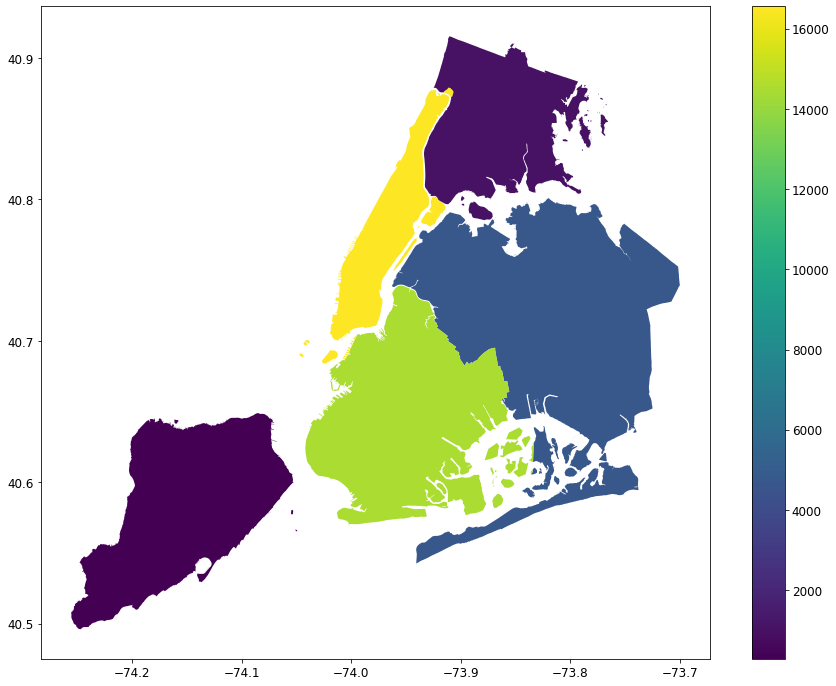

In [100]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='airbnb_num',ax=ax,legend=True)

plt.show()

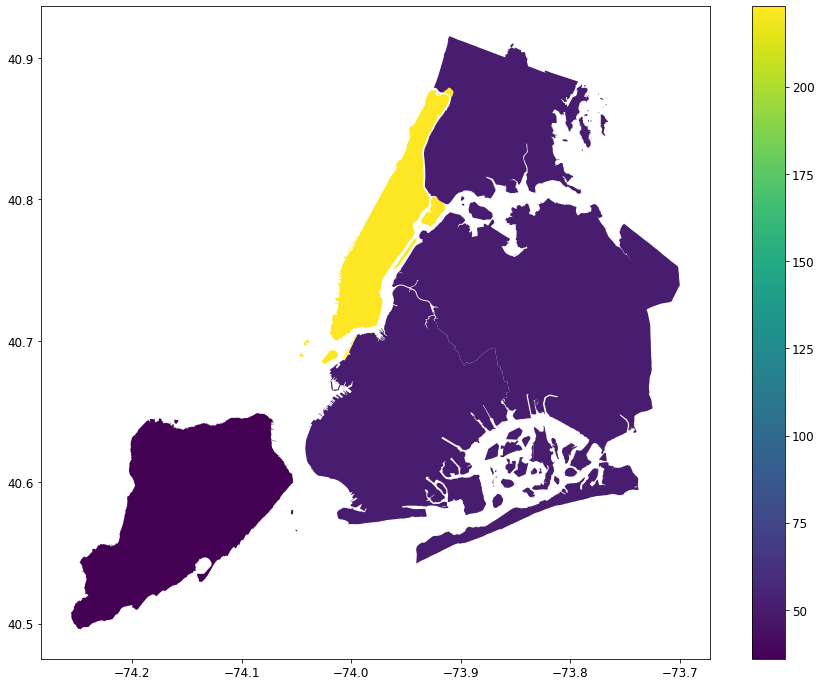

In [101]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='starbucks_num',ax=ax,legend=True)

plt.show()

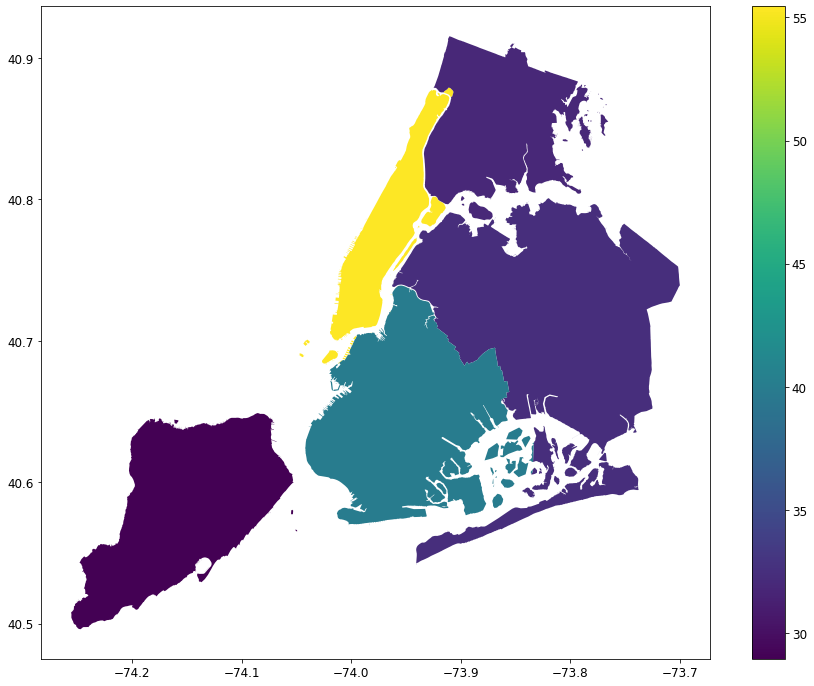

In [102]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='price_per_acc',ax=ax,legend=True)

plt.show()

- Remove the text attribute because median can only be calculated on numerical attributes:

## EUNICE Edit - Starts Here - IMPUTATION

### I have not deleted anything - I just commented out codes that I think we should delete

In [421]:
#sample_incomplete_rows = df_num[df_num.isnull().any(axis=1)].head()

In [422]:
#imputer.fit(df_num)

In [423]:
#imputer.statistics_

In [424]:
#df_num.median().values

In [425]:
#X = imputer.transform(df_num)
#df_tr = pd.DataFrame(X, columns=df_num.columns,
#                          index=df1.index)
#df_tr.loc[sample_incomplete_rows.index.values]

### Check for missing values

In [426]:
#imputer.strategy
#df_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)
#df_tr.head()

In [103]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df1)
miss_values.head(20)

Dataframe has 43 columns.
There are 9 columns that have missing values.


Missing Values  % of Total Values
host_response_time             13059               49.0
host_response_rate             13059               49.0
host_about                      9559               35.9
host_acceptance_rate            9404               35.3
bedrooms                        2522                9.5
description                      459                1.7
beds                             130                0.5
bathrooms_text                    39                0.1
name                               5                0.0

### Flag Missing Values

**Create a new column called 'Flag' which is 1 if a row is complete with all its values, and 0 if there is a missing value in the row**

In [104]:
df1['flag'] = df1.notna().all(axis=1).view('i1')

In [105]:
df1

last_scraped                                               name  \
0       2021-02-05                              Skylit Midtown Castle   
1       2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2       2021-02-05                                    BlissArtsSpace!   
3       2021-02-05                   Large Furnished Room Near B'way　   
4       2021-02-06                 Cozy Clean Guest Room - Family Apt   
...            ...                                                ...   
36818   2021-02-06                       lanigirO    JFK•Casino•Beach   
36832   2021-02-05                Beautiful Room at Central Park West   
36848   2021-02-05            Big Blue Room & confortable in Brooklyn   
36851   2021-02-05                   Cozy room in heart of Brooklyn💓😌   
36915   2021-02-06  Peaceful & luxurious apt. in the heart of Astoria   

                                             description           host_name  \
0      Beautiful, spacious skylit studio in the heart...            Jennifer   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...         LisaRoxanne   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...               Garon   
3      Please don’t expect the luxury here just a bas...            Shunichi   
4      Our best guests are seeking a safe, clean, spa...           MaryEllen   
...                                                  ...                 ...   
36818  This is an entire compact basement studio to y...                Ryan   
36832                                                NaN               Deniz   
36848  It is a beautiful private room, the bathroom i...  Cristina And Sasha   
36851                                                NaN           Valentina   
36915  Peaceful and Luxurious apartment in the heart ...            Giovanni   

       host_since                                         host_about  \
0      2008-09-09  A New Yorker since 2000! My passion is creatin...   
1      2008-12-07  Laid-back Native New Yorker (formerly bi-coast...   
2      2009-02-03   I am an artist(painter, filmmaker) and curato...   
3      2009-03-03  I used to work for a financial industry but no...   
4      2009-02-05  Welcome to family life with my oldest two away...   
...           ...                                                ...   
36818  2017-06-03                                                NaN   
36832  2015-08-03  I am Deniz 34 years old student pilot in New Y...   
36848  2016-11-15  Sasha is from Omaha originally but has lived i...   
36851  2019-10-07                                                NaN   
36915  2017-11-07                                                NaN   

       host_response_time host_response_rate host_acceptance_rate  \
0      within a few hours                93%                  26%   
1      within a few hours                98%                  93%   
2                     NaN                NaN                  NaN   
3            within a day               100%                 100%   
4                     NaN                NaN                  NaN   
...                   ...                ...                  ...   
36818      within an hour               100%                  98%   
36832      within an hour               100%                 100%   
36848      within an hour               100%                  98%   
36851  within a few hours                91%                 100%   
36915      within an hour               100%                 100%   

       host_is_superhost  ...  description_length host_about_length  \
0                      0  ...                 151                67   
1                      0  ...                 165                35   
2                      0  ...                 175                69   
3                      0  ...                 165                21   
4                      0  ...                 171               140   
...                  ...  ...                 ..

In [106]:
sum(df1.flag)

7831

There are 7831 rows with at least 1 missing value

**Another flagging method: flag the missing rows in each column separately**

In [107]:
cols = ['host_response_time','host_response_rate','host_acceptance_rate','bedrooms','description','beds','bathrooms_text','name']
df_try = df1[cols].isnull().astype(int).add_suffix('_indicator')
#df_try

#merge both the df1 and the flagged columns
df2 = pd.merge(df1, df_try, left_index=True, right_index=True)
df2.head(10)

last_scraped                                               name  \
0    2021-02-05                              Skylit Midtown Castle   
1    2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2    2021-02-05                                    BlissArtsSpace!   
3    2021-02-05                   Large Furnished Room Near B'way　   
4    2021-02-06                 Cozy Clean Guest Room - Family Apt   
5    2021-02-05     Lovely Room 1, Garden, Best Area, Legal rental   
6    2021-02-05                   Only 2 stops to Manhattan studio   
8    2021-02-06                            UES Beautiful Blue Room   
9    2021-02-05        Perfect for Your Parents:  Privacy + Garden   
11   2021-02-06                   Sweet and Spacious Brooklyn Loft   

                                          description      host_name  \
0   Beautiful, spacious skylit studio in the heart...       Jennifer   
1   Enjoy 500 s.f. top floor in 1899 brownstone, w...    LisaRoxanne   
2   <b>The space</b><br />HELLO EVERYONE AND THANK...          Garon   
3   Please don’t expect the luxury here just a bas...       Shunichi   
4   Our best guests are seeking a safe, clean, spa...      MaryEllen   
5   Discounted now!   Beautiful house, gorgeous ga...         Laurie   
6   Comfortable studio apartment with super comfor...  Allen & Irina   
8   Beautiful peaceful healthy home<br /><br /><b>...            Cyn   
9   Parents/grandparents coming to town, or are yo...           Jane   
11  A true open-plan loft in a repurposed factory ...          Chaya   

    host_since                                         host_about  \
0   2008-09-09  A New Yorker since 2000! My passion is creatin...   
1   2008-12-07  Laid-back Native New Yorker (formerly bi-coast...   
2   2009-02-03   I am an artist(painter, filmmaker) and curato...   
3   2009-03-03  I used to work for a financial industry but no...   
4   2009-02-05  Welcome to family life with my oldest two away...   
5   2009-03-10  Hello, \r\nI will be welcoming and helpful,  w...   
6   2009-05-06  We love to travel. When we travel we like to s...   
8   2009-05-12  Capturing the Steinbeck side of life in its Fi...   
9   2009-05-17  I have been an Airbnb host since 2009 -- just ...   
11  2009-06-12  We're a couple in our thirties who love to tra...   

    host_response_time host_response_rate host_acceptance_rate  \
0   within a few hours                93%                  26%   
1   within a few hours                98%                  93%   
2                  NaN                NaN                  NaN   
3         within a day               100%                 100%   
4                  NaN                NaN                  NaN   
5       within an hour               100%                 100%   
6                  NaN                NaN                  75%   
8       within an hour               100%                 100%   
9       within an hour               100%                 100%   
11      within an hour               100%                  62%   

    host_is_superhost  ...  has_Hair_dryer flag  host_response_time_indicator  \
0                   0  ...               1    0                             0   
1                   0  ...               1    1                             0   
2                   0  ...               0    0                             1   
3                   0  ...               1    1                             0   
4                   0  ...               1    0                             1   
5                   1  ...               1    1                             0   
6                   0  ...               1    0                             1   
8                   0  ...               1    1                             0   
9                   1  ...               1    1                             0   
11                  0  ...               0    0                             0   

   host_response_rate_indicator host_acceptance_rate_indicat

In [24]:
#Drop the rows with NaN value for all categorical columns
#df1=df1.dropna()

**Convert 'host_acceptance_rate' and 'host_response_rate' to numerical variables by removing the %'**

In [108]:
#get all the non-null values and Convert the object datatype to numerical datatype: host_response_rate, host_acceptance_rate
test = df2[['host_response_rate','host_acceptance_rate']].dropna()
test['host_acceptance_rate'] =test['host_acceptance_rate'].str.replace('%',"").astype(int)/100
test['host_response_rate'] =test['host_response_rate'].str.replace('%',"").astype(int)/100
test

host_response_rate  host_acceptance_rate
0                    0.93                  0.26
1                    0.98                  0.93
3                    1.00                  1.00
5                    1.00                  1.00
8                    1.00                  1.00
...                   ...                   ...
36818                1.00                  0.98
36832                1.00                  1.00
36848                1.00                  0.98
36851                0.91                  1.00
36915                1.00                  1.00

[13146 rows x 2 columns]

In [109]:
#Add the numeric values back into the dataframe (replacement)
df2['host_response_rate'].loc[test.index] = test['host_response_rate']
df2['host_acceptance_rate'].loc[test.index] = test['host_acceptance_rate']
df2

last_scraped                                               name  \
0       2021-02-05                              Skylit Midtown Castle   
1       2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2       2021-02-05                                    BlissArtsSpace!   
3       2021-02-05                   Large Furnished Room Near B'way　   
4       2021-02-06                 Cozy Clean Guest Room - Family Apt   
...            ...                                                ...   
36818   2021-02-06                       lanigirO    JFK•Casino•Beach   
36832   2021-02-05                Beautiful Room at Central Park West   
36848   2021-02-05            Big Blue Room & confortable in Brooklyn   
36851   2021-02-05                   Cozy room in heart of Brooklyn💓😌   
36915   2021-02-06  Peaceful & luxurious apt. in the heart of Astoria   

                                             description           host_name  \
0      Beautiful, spacious skylit studio in the heart...            Jennifer   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...         LisaRoxanne   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...               Garon   
3      Please don’t expect the luxury here just a bas...            Shunichi   
4      Our best guests are seeking a safe, clean, spa...           MaryEllen   
...                                                  ...                 ...   
36818  This is an entire compact basement studio to y...                Ryan   
36832                                                NaN               Deniz   
36848  It is a beautiful private room, the bathroom i...  Cristina And Sasha   
36851                                                NaN           Valentina   
36915  Peaceful and Luxurious apartment in the heart ...            Giovanni   

       host_since                                         host_about  \
0      2008-09-09  A New Yorker since 2000! My passion is creatin...   
1      2008-12-07  Laid-back Native New Yorker (formerly bi-coast...   
2      2009-02-03   I am an artist(painter, filmmaker) and curato...   
3      2009-03-03  I used to work for a financial industry but no...   
4      2009-02-05  Welcome to family life with my oldest two away...   
...           ...                                                ...   
36818  2017-06-03                                                NaN   
36832  2015-08-03  I am Deniz 34 years old student pilot in New Y...   
36848  2016-11-15  Sasha is from Omaha originally but has lived i...   
36851  2019-10-07                                                NaN   
36915  2017-11-07                                                NaN   

       host_response_time host_response_rate host_acceptance_rate  \
0      within a few hours               0.93                 0.26   
1      within a few hours               0.98                 0.93   
2                     NaN                NaN                  NaN   
3            within a day                  1                    1   
4                     NaN                NaN                  NaN   
...                   ...                ...                  ...   
36818      within an hour                  1                 0.98   
36832      within an hour                  1                    1   
36848      within an hour                  1                 0.98   
36851  within a few hours               0.91                    1   
36915      within an hour                  1                    1   

       host_is_superhost  ...  has_Hair_dryer flag  \
0                      0  ...               1    0   
1                      0  ...               1    1   
2                      0  ...               0    0   
3                      0  ...               1    1   
4                      0  ...               1    0   
...                  ...  ...             ...  ...   
36818                  1  ...               0    0   
36832                  0  ...             

### Iterative imputer on numerical variables

In [110]:
#for some reason, the added values become 'objects', so you need to convert them to 'floats'
df2['host_response_rate'] = pd.to_numeric(df2['host_response_rate'],errors = 'coerce')
df2['host_acceptance_rate'] = pd.to_numeric(df2['host_acceptance_rate'],errors = 'coerce')

In [111]:
df_num=df2.drop(['neighbourhood_group_cleansed'],axis=1).iloc[:,np.r_[7:11,12,14:16,17,19:21,22:27,29:42]]

In [112]:
df_num

host_is_superhost  host_total_listings_count  host_identity_verified  \
0                      0                        6.0                       1   
1                      0                        1.0                       1   
2                      0                        1.0                       1   
3                      0                        1.0                       0   
4                      0                        1.0                       1   
...                  ...                        ...                     ...   
36818                  1                        3.0                       1   
36832                  0                        4.0                       1   
36848                  0                        4.0                       1   
36851                  0                        1.0                       1   
36915                  0                        1.0                       1   

       latitude  longitude  accommodates  bedrooms  beds  price  \
0      40.75362  -73.98377             2       NaN   1.0  100.0   
1      40.68514  -73.95976             3       1.0   3.0   73.0   
2      40.68688  -73.95596             2       1.0   1.0   60.0   
3      40.76468  -73.98315             2       1.0   1.0   79.0   
4      40.80178  -73.96723             1       1.0   1.0   75.0   
...         ...        ...           ...       ...   ...    ...   
36818  40.67319  -73.84068             2       1.0   1.0  110.0   
36832  40.79851  -73.96004             1       4.0   5.0   46.0   
36848  40.70146  -73.94368             2       1.0   1.0   65.0   
36851  40.70430  -73.92561             2       1.0   1.0   30.0   
36915  40.76801  -73.91197             3       1.0   1.0  111.0   

       minimum_nights  ...  name_length  description_length  \
0                  30  ...            3                 151   
1                   1  ...            8                 165   
2                  30  ...            1                 175   
3                   2  ...            5                 165   
4                   2  ...            7                 171   
...               ...  ...          ...                 ...   
36818               1  ...            2                 168   
36832               5  ...            6                   1   
36848               1  ...            7                 146   
36851               1  ...            6                   1   
36915               1  ...            9                  72   

       host_about_length  verifications_length  amenities_length  \
0                     67                     9                31   
1                     35                     6                35   
2                     69                     8                 5   
3                     21                     4                18   
4                    140                     7                16   
...                  ...                   ...               ...   
36818                  1                    10                16   
36832                 23                     5                20   
36848                221                     7                28   
36851                  1                     6                20   
36915                  1                     4                19   

       host_since_days  first_reviews_days  last_review_days  \
0                 4532                4094               459   
1                 4443                2320                 9   
2                 4385                4271               431   
3                 4357                4293               133   
4                 4384                4170              1296   
...                ...                 ...               ...   
36818             1344                   1                 1   
36832             2013                   6                 6   
36848             1543                   1                 1   
36851              487                 

In [113]:
# Missing values statistics
miss_values = missing_values(df_num)
miss_values.head(20)

Dataframe has 26 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
bedrooms            2522                9.5
beds                 130                0.5

In [114]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=0)

df_num1 = imp.fit_transform(df_num)

cols = list(df_num)

df_num1=pd.DataFrame(df_num1)
df_num1.columns=cols
df_num1

host_is_superhost  host_total_listings_count  host_identity_verified  \
0                    0.0                        6.0                     1.0   
1                    0.0                        1.0                     1.0   
2                    0.0                        1.0                     1.0   
3                    0.0                        1.0                     0.0   
4                    0.0                        1.0                     1.0   
...                  ...                        ...                     ...   
26628                1.0                        3.0                     1.0   
26629                0.0                        4.0                     1.0   
26630                0.0                        4.0                     1.0   
26631                0.0                        1.0                     1.0   
26632                0.0                        1.0                     1.0   

       latitude  longitude  accommodates  bedrooms  beds  price  \
0      40.75362  -73.98377           2.0   1.02934   1.0  100.0   
1      40.68514  -73.95976           3.0   1.00000   3.0   73.0   
2      40.68688  -73.95596           2.0   1.00000   1.0   60.0   
3      40.76468  -73.98315           2.0   1.00000   1.0   79.0   
4      40.80178  -73.96723           1.0   1.00000   1.0   75.0   
...         ...        ...           ...       ...   ...    ...   
26628  40.67319  -73.84068           2.0   1.00000   1.0  110.0   
26629  40.79851  -73.96004           1.0   4.00000   5.0   46.0   
26630  40.70146  -73.94368           2.0   1.00000   1.0   65.0   
26631  40.70430  -73.92561           2.0   1.00000   1.0   30.0   
26632  40.76801  -73.91197           3.0   1.00000   1.0  111.0   

       minimum_nights  ...  name_length  description_length  \
0                30.0  ...          3.0               151.0   
1                 1.0  ...          8.0               165.0   
2                30.0  ...          1.0               175.0   
3                 2.0  ...          5.0               165.0   
4                 2.0  ...          7.0               171.0   
...               ...  ...          ...                 ...   
26628             1.0  ...          2.0               168.0   
26629             5.0  ...          6.0                 1.0   
26630             1.0  ...          7.0               146.0   
26631             1.0  ...          6.0                 1.0   
26632             1.0  ...          9.0                72.0   

       host_about_length  verifications_length  amenities_length  \
0                   67.0                   9.0              31.0   
1                   35.0                   6.0              35.0   
2                   69.0                   8.0               5.0   
3                   21.0                   4.0              18.0   
4                  140.0                   7.0              16.0   
...                  ...                   ...               ...   
26628                1.0                  10.0              16.0   
26629               23.0                   5.0              20.0   
26630              221.0                   7.0              28.0   
26631                1.0                   6.0              20.0   
26632                1.0                   4.0              19.0   

       host_since_days  first_reviews_days  last_review_days  \
0               4532.0              4094.0             459.0   
1               4443.0              2320.0               9.0   
2               4385.0              4271.0             431.0   
3               4357.0              4293.0             133.0   
4               4384.0              4170.0            1296.0   
...                ...                 ...               ...   
26628           1344.0                 1.0               1.0   
26629           2013.0                 6.0               6.0   
26630           1543.0                 1.0               1.0   
26631            487.0                 

In [115]:
# Re-check Missing values statistics
miss_values = missing_values(df_num1)
miss_values.head(20)

Dataframe has 26 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

**Now, replace the incomplete columns in df2 with the corresponding imputed columns from df_num1**

In [116]:
df2[cols] = df_num1[cols].values

df2.head(5)

last_scraped                                               name  \
0   2021-02-05                              Skylit Midtown Castle   
1   2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2   2021-02-05                                    BlissArtsSpace!   
3   2021-02-05                   Large Furnished Room Near B'way　   
4   2021-02-06                 Cozy Clean Guest Room - Family Apt   

                                         description    host_name  host_since  \
0  Beautiful, spacious skylit studio in the heart...     Jennifer  2008-09-09   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...  LisaRoxanne  2008-12-07   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...        Garon  2009-02-03   
3  Please don’t expect the luxury here just a bas...     Shunichi  2009-03-03   
4  Our best guests are seeking a safe, clean, spa...    MaryEllen  2009-02-05   

                                          host_about  host_response_time  \
0  A New Yorker since 2000! My passion is creatin...  within a few hours   
1  Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2   I am an artist(painter, filmmaker) and curato...                 NaN   
3  I used to work for a financial industry but no...        within a day   
4  Welcome to family life with my oldest two away...                 NaN   

   host_response_rate  host_acceptance_rate  host_is_superhost  ...  \
0                0.93                  0.26                0.0  ...   
1                0.98                  0.93                0.0  ...   
2                 NaN                   NaN                0.0  ...   
3                1.00                  1.00                0.0  ...   
4                 NaN                   NaN                0.0  ...   

   has_Hair_dryer flag  host_response_time_indicator  \
0             1.0    0                             0   
1             1.0    1                             0   
2             0.0    0                             1   
3             1.0    1                             0   
4             1.0    0                             1   

  host_response_rate_indicator host_acceptance_rate_indicator  \
0                            0                              0   
1                            0                              0   
2                            1                              1   
3                            0                              0   
4                            1                              1   

   bedrooms_indicator  description_indicator beds_indicator  \
0                   1                      0              0   
1                   0                      0              0   
2                   0                      0              0   
3                   0                      0              0   
4                   0                      0              0   

   bathrooms_text_indicator name_indicator  
0                         0              0  
1                         0              0  
2                         1              0  
3                         0              0  
4                         0              0  

[5 rows x 52 columns]

In [117]:
# Check Missing values statistics again
miss_values = missing_values(df2)
miss_values.head(20)

Dataframe has 52 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
host_response_rate             13487               50.6
host_acceptance_rate           13487               50.6
host_response_time             13059               49.0
host_about                      9559               35.9
description                      459                1.7
bathrooms_text                    39                0.1
name                               5                0.0

We have taken care of the numerical values, and need to work on the categorical values next...

# Eunice Edit - Ends here

**For the remaining categorical variables, I suggest we:
- host_response_time and bathrooms_text: impute with the most common value
- host_about, description and name: remove null rows

In [119]:
df1 = df2

In [120]:
df1.head()

last_scraped                                               name  \
0   2021-02-05                              Skylit Midtown Castle   
1   2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2   2021-02-05                                    BlissArtsSpace!   
3   2021-02-05                   Large Furnished Room Near B'way　   
4   2021-02-06                 Cozy Clean Guest Room - Family Apt   

                                         description    host_name  host_since  \
0  Beautiful, spacious skylit studio in the heart...     Jennifer  2008-09-09   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...  LisaRoxanne  2008-12-07   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...        Garon  2009-02-03   
3  Please don’t expect the luxury here just a bas...     Shunichi  2009-03-03   
4  Our best guests are seeking a safe, clean, spa...    MaryEllen  2009-02-05   

                                          host_about  host_response_time  \
0  A New Yorker since 2000! My passion is creatin...  within a few hours   
1  Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2   I am an artist(painter, filmmaker) and curato...                 NaN   
3  I used to work for a financial industry but no...        within a day   
4  Welcome to family life with my oldest two away...                 NaN   

   host_response_rate  host_acceptance_rate  host_is_superhost  ...  \
0                0.93                  0.26                0.0  ...   
1                0.98                  0.93                0.0  ...   
2                 NaN                   NaN                0.0  ...   
3                1.00                  1.00                0.0  ...   
4                 NaN                   NaN                0.0  ...   

   has_Hair_dryer flag  host_response_time_indicator  \
0             1.0    0                             0   
1             1.0    1                             0   
2             0.0    0                             1   
3             1.0    1                             0   
4             1.0    0                             1   

  host_response_rate_indicator host_acceptance_rate_indicator  \
0                            0                              0   
1                            0                              0   
2                            1                              1   
3                            0                              0   
4                            1                              1   

   bedrooms_indicator  description_indicator beds_indicator  \
0                   1                      0              0   
1                   0                      0              0   
2                   0                      0              0   
3                   0                      0              0   
4                   0                      0              0   

   bathrooms_text_indicator name_indicator  
0                         0              0  
1                         0              0  
2                         1              0  
3                         0              0  
4                         0              0  

[5 rows x 52 columns]

### 3. Get the general insight for Airbnb dataset

In [121]:
#get the data type for each column of variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26633 entries, 0 to 36915
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    26633 non-null  object 
 1   name                            26628 non-null  object 
 2   description                     26174 non-null  object 
 3   host_name                       26633 non-null  object 
 4   host_since                      26633 non-null  object 
 5   host_about                      17074 non-null  object 
 6   host_response_time              13574 non-null  object 
 7   host_response_rate              13146 non-null  float64
 8   host_acceptance_rate            13146 non-null  float64
 9   host_is_superhost               26633 non-null  float64
 10  host_total_listings_count       26633 non-null  float64
 11  host_verifications              26633 non-null  object 
 12  host_identity_verified          

In [122]:
#Get the statistic value for each numerical columns
df1.describe()

host_response_rate  host_acceptance_rate  host_is_superhost  \
count        13146.000000          13146.000000       26633.000000   
mean             0.907164              0.831363           0.244133   
std              0.217539              0.236266           0.429580   
min              0.000000              0.000000           0.000000   
25%              0.930000              0.770000           0.000000   
50%              1.000000              0.930000           0.000000   
75%              1.000000              1.000000           0.000000   
max              1.000000              1.000000           1.000000   

       host_total_listings_count  host_identity_verified      latitude  \
count               26633.000000            26633.000000  26633.000000   
mean                    9.835993                0.808095     40.728427   
std                    80.411290                0.393806      0.055748   
min                     0.000000                0.000000     40.508680   
25%                     1.000000                1.000000     40.688250   
50%                     1.000000                1.000000     40.723130   
75%                     2.000000                1.000000     40.762590   
max                  2739.000000                1.000000     40.910780   

          longitude  accommodates      bedrooms          beds  ...  \
count  26633.000000  26633.000000  26633.000000  26633.000000  ...   
mean     -73.949718      2.865918      1.296941      1.562184  ...   
std        0.049462      1.845104      0.737421      1.158780  ...   
min      -74.239860      1.000000      0.486851      0.000000  ...   
25%      -73.983090      2.000000      1.000000      1.000000  ...   
50%      -73.954730      2.000000      1.000000      1.000000  ...   
75%      -73.932540      4.000000      1.055932      2.000000  ...   
max      -73.710870     16.000000     50.892007     42.000000  ...   

       has_Hair_dryer          flag  host_response_time_indicator  \
count    26633.000000  26633.000000                  26633.000000   
mean         0.697706      0.294034                      0.490332   
std          0.459261      0.455616                      0.499916   
min          0.000000      0.000000                      0.000000   
25%          0.000000      0.000000                      0.000000   
50%          1.000000      0.000000                      0.000000   
75%          1.000000      1.000000                      1.000000   
max          1.000000      1.000000                      1.000000   

       host_response_rate_indicator  host_acceptance_rate_indicator  \
count                  26633.000000                    26633.000000   
mean                       0.490332                        0.353096   
std                        0.499916                        0.477941   
min                        0.000000                        0.000000   
25%                        0.000000                        0.000000   
50%                        0.000000                        0.000000   
75%                        1.000000                        1.000000   
max                        1.000000                        1.000000   

       bedrooms_indicator  description_indicator  beds_indicator  \
count        26633.000000           26633.000000    26633.000000   
mean             0.094695               0.017234        0.004881   
std              0.292798               0.130146        0.069696   
min              0.000000               0.000000        0.000000   
25%              0.000000               0.000000        0.000000   
50%              0.000000               0.000000        0.000000   
75%              0.000000               0.000000        0.000000   
max              1.000000               1.000000        1.000000   

       bathrooms_text_indicator  name_indicator  
count              26633.000000    26633.000000  
mean                   0.001464        0.000188  
std                    0.038239        0.013701  
min

In [123]:
# Get the numerical columns' distribution
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15),grid=False)
plt.savefig("attribute_histogram_plots.png")
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C28CC1F1F8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#Plot the correlation plot among the numerical varaibles
import seaborn as sns
matrix = np.triu(df1.corr())
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(), annot = True,mask=matrix)
plt.savefig("correlation_plot")
fig.show()

### 4. Split test and train sets

In [124]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [163]:
df_drop_na=df1.dropna()

In [164]:
df_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8646 entries, 0 to 36848
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   last_scraped                    8646 non-null   object  
 1   name                            8646 non-null   object  
 2   description                     8646 non-null   object  
 3   host_name                       8646 non-null   object  
 4   host_since                      8646 non-null   object  
 5   host_about                      8646 non-null   object  
 6   host_response_time              8646 non-null   object  
 7   host_response_rate              8646 non-null   float64 
 8   host_acceptance_rate            8646 non-null   float64 
 9   host_is_superhost               8646 non-null   float64 
 10  host_total_listings_count       8646 non-null   float64 
 11  host_verifications              8646 non-null   object  
 12  host_identity_verif

In [134]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [165]:
train_set,test_set=split_train_test(df_drop_na,0.2)
print("The length of train set is: ",len(train_set))
print("The length of test set is: ",len(test_set))

The length of train set is:  6917
The length of test set is:  1729


In [166]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [167]:
df1_with_id =df_drop_na.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(df1_with_id, 0.2, "index")

In [168]:
test_set.head()

index last_scraped                                              name  \
3       5   2021-02-05    Lovely Room 1, Garden, Best Area, Legal rental   
7      12   2021-02-05  Maison des Sirenes1,bohemian, luminous apartment   
9      16   2021-02-05                             Large B&B Style rooms   
14     23   2021-02-05                               (E) RIGHT ON BUDGET   
15     25   2021-02-05   Blue Room for 2 in Brownstone for $1350 monthly   

                                          description       host_name  \
3   Discounted now!   Beautiful house, gorgeous ga...          Laurie   
7   <b>The space</b><br />I am the lucky owner of ...        Nathalie   
9   <b>The space</b><br />Private Rooms for Rent <...          Angela   
14  <b>The space</b><br />Private Room in resident...         Jullett   
15  Romantic quiet room in a beautiful 1800 Libert...  JT And Tiziana   

    host_since                                         host_about  \
3   2009-03-10  Hello, \r\nI will be welcoming and helpful,  w...   
7   2009-07-10   I am French and have been living in Ny for 10...   
9   2009-09-03                          Loves to travel and host.   
14  2009-07-27  Registered Nurse who is very open and flexible...   
15  2009-11-14  J.T. is a musician and a college professor of ...   

    host_response_time  host_response_rate  host_acceptance_rate  ...  flag  \
3       within an hour                 1.0                  1.00  ...     1   
7       within an hour                 1.0                  0.95  ...     1   
9       within an hour                 1.0                  1.00  ...     1   
14  within a few hours                 1.0                  0.50  ...     1   
15  within a few hours                 1.0                  0.94  ...     1   

    host_response_time_indicator host_response_rate_indicator  \
3                              0                            0   
7                              0                            0   
9                              0                            0   
14                             0                            0   
15                             0                            0   

    host_acceptance_rate_indicator bedrooms_indicator description_indicator  \
3                                0                  0                     0   
7                                0                  0                     0   
9                                0                  0                     0   
14                               0                  0                     0   
15                               0                  0                     0   

    beds_indicator  bathrooms_text_indicator name_indicator  rating_cat  
3                0                         0              0           2  
7                0                         0              0           2  
9                0                         0              0           2  
14               0                         0              0           1  
15               0                         0              0           2  

[5 rows x 54 columns]

In [482]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_drop_na, test_size=0.2, random_state=42)

In [483]:
test_set.head()

last_scraped                                              name  \
34389   2021-02-05  Absolutely HUGE room 2 blocks from Prospect Park   
16350   2021-02-05                           Charming 1875 Victorian   
406     2021-02-05                Spacious & Charming by Prospect Pk   
19291   2021-02-06         U2 comfortable double bed sleeps 2 guests   
603     2021-02-05    Unique private room and bathroom in Brownstone   

                                             description  \
34389  Your HUGE private bedroom (200 sq ft) includes...   
16350  Renovated bohemian one bedroom garden apartmen...   
406    Large alcove studio apartment around the corne...   
19291  <b>The space</b><br />This air conditioned roo...   
603    <b>The space</b><br />Enjoy your stay in New Y...   

                    host_name  host_since  \
34389                  Eugene  2012-08-11   
16350  Elizabeth And Timothee  2011-07-10   
406                      Todd  2011-10-06   
19291            Carol Gloria  2010-11-22   
603                     Laura  2012-02-12   

                                              host_about  host_response_time  \
34389  my number: (Phone number hidden by Airbnb) , m...        within a day   
16350  Elizabeth is an acupuncturist working in NYC. ...      within an hour   
406    Oh man, what to write. Here's my website: (Web...  within a few hours   
19291   I'm a world traveler and a retired customer s...      within an hour   
603    I have been living in New York for at least 10...        within a day   

       host_response_rate  host_acceptance_rate  host_is_superhost  ...  flag  \
34389                0.93                  0.45                1.0  ...     1   
16350                1.00                  0.96                1.0  ...     1   
406                  1.00                  1.00                0.0  ...     1   
19291                1.00                  0.78                0.0  ...     1   
603                  1.00                  0.38                0.0  ...     1   

      host_response_time_indicator  host_response_rate_indicator  \
34389                            0                             0   
16350                            0                             0   
406                              0                             0   
19291                            0                             0   
603                              0                             0   

      host_acceptance_rate_indicator bedrooms_indicator  \
34389                              0                  0   
16350                              0                  0   
406                                0                  0   
19291                              0                  0   
603                                0                  0   

       description_indicator  beds_indicator bathrooms_text_indicator  \
34389                      0               0                        0   
16350                      0               0                        0   
406                        0               0                        0   
19291                      0               0                        0   
603                        0               0                        0   

       name_indicator rating_cat  
34389               0          4  
16350               0          3  
406                 0          4  
19291               0          2  
603                 0          2  

[5 rows x 53 columns]

In [418]:
df1["rating_cat"] = pd.cut(df1["review_scores_rating"],
                               bins=[19, 92, 96, 99, 101],
                               labels=[1, 2, 3, 4])

In [419]:
df1["rating_cat"].value_counts()

4    8324
1    7085
2    6133
3    5091
Name: rating_cat, dtype: int64

- As shown below, Shuffle the dataset to avoid the bais batween the train and test sets by rearranging the order of items in a list randomly


In [144]:
from sklearn.model_selection import StratifiedShuffleSplit

In [158]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df1, df1["rating_cat"]):
    strat_train_set =df1.iloc[train_index,:]
    strat_test_set = df1.iloc[test_index,:]

In [147]:
strat_test_set.head()

last_scraped                                               name  \
9713    2021-02-05                Spacious 5 Bedroom Apt Williamsburg   
7511    2021-02-05    A room for you in Williamsburg! Only for Women.   
18865   2021-02-05  Williamsburg Luxury Artist Loft With All Ameni...   
3438    2021-02-05                Gorgeous Apartment in Heart of Soho   
24013   2021-02-06          Two Double Beds, Overlooking Central Park   

                                             description  host_name  \
9713   ***PLEASE NOTE: PHOTOS CURRENTLY BEING ADDED/U...     Jessie   
7511   Before you make a reservation, please note the...       Mary   
18865  Spacious loft. <br />Fully renovated.<br />Ton...     Samuel   
3438   Experience the trendiest area in New York City...   Leighann   
24013  From floors 30 to 46, enjoy bird’s-eye view of...  Park Lane   

       host_since                                         host_about  \
9713   2015-04-06                                                NaN   
7511   2015-10-23  I'm a newyorker who loves to travel, host and ...   
18865  2010-09-29  Works in Academia. Loves music, travels and go...   
3438   2013-03-07  Hello! I am a mid-20's finance professional th...   
24013  2019-05-07  WELCOME TO THE PARK LANE HOTEL - A CENTRAL PAR...   

       host_response_time  host_response_rate  host_acceptance_rate  \
9713                  NaN                 NaN                   NaN   
7511   within a few hours                1.00                  0.91   
18865                 NaN                 NaN                   NaN   
3438                  NaN                 NaN                   NaN   
24013      within an hour                0.96                  0.98   

       host_is_superhost  ...  flag host_response_time_indicator  \
9713                 0.0  ...     0                            1   
7511                 1.0  ...     1                            0   
18865                0.0  ...     0                            1   
3438                 0.0  ...     0                            1   
24013                0.0  ...     1                            0   

       host_response_rate_indicator host_acceptance_rate_indicator  \
9713                              1                              1   
7511                              0                              0   
18865                             1                              0   
3438                              1                              1   
24013                             0                              0   

      bedrooms_indicator  description_indicator  beds_indicator  \
9713                   0                      0               0   
7511                   0                      0               0   
18865                  0                      0               0   
3438                   0                      0               0   
24013                  0                      0               0   

      bathrooms_text_indicator  name_indicator rating_cat  
9713                         0               0          4  
7511                         0               0          3  
18865                        0               0          3  
3438                         0               0          4  
24013                        0               0          2  

[5 rows x 53 columns]

# Discover and visualize the data to gain insights

### 1. Draw the word cloud for text variables

The word cloud for "description", <br>
which can help us to get the most popular words for hosts to describe thier Airbnb apartments.

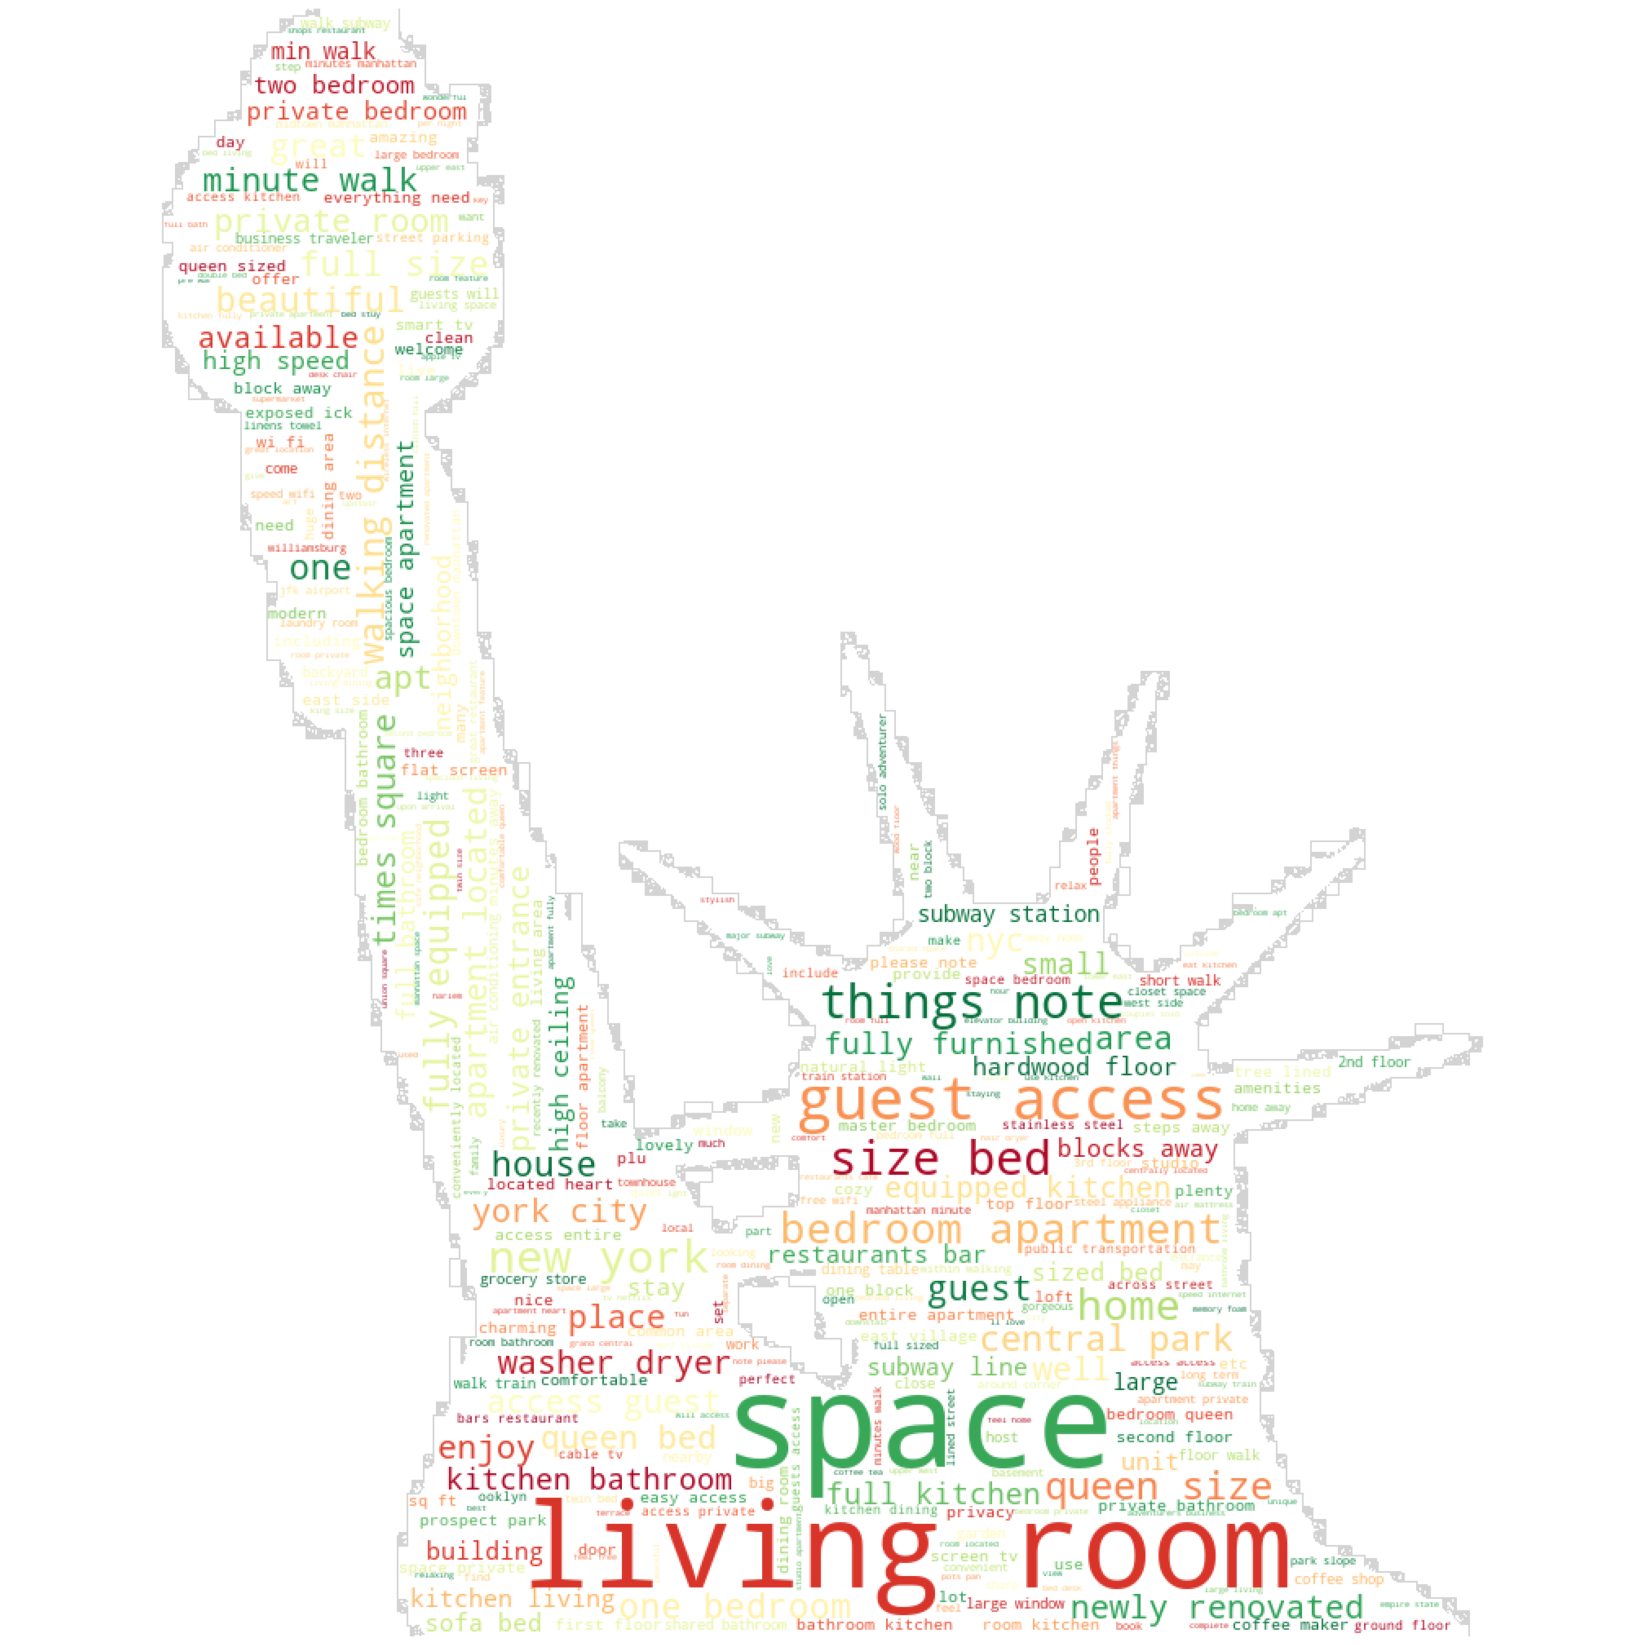

In [70]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['description']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment')
mask = np.array(Image.open("liberty_statue.jpg"))


wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=800,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 

plt.axis("off") 
#plt.tight_layout(pad = 0) 
plt.savefig("wordcloud_desription.jpg")
plt.show()




The word cloud for "host_about", <br>
which can help us to get the most popular words for hosts to introduce themselves

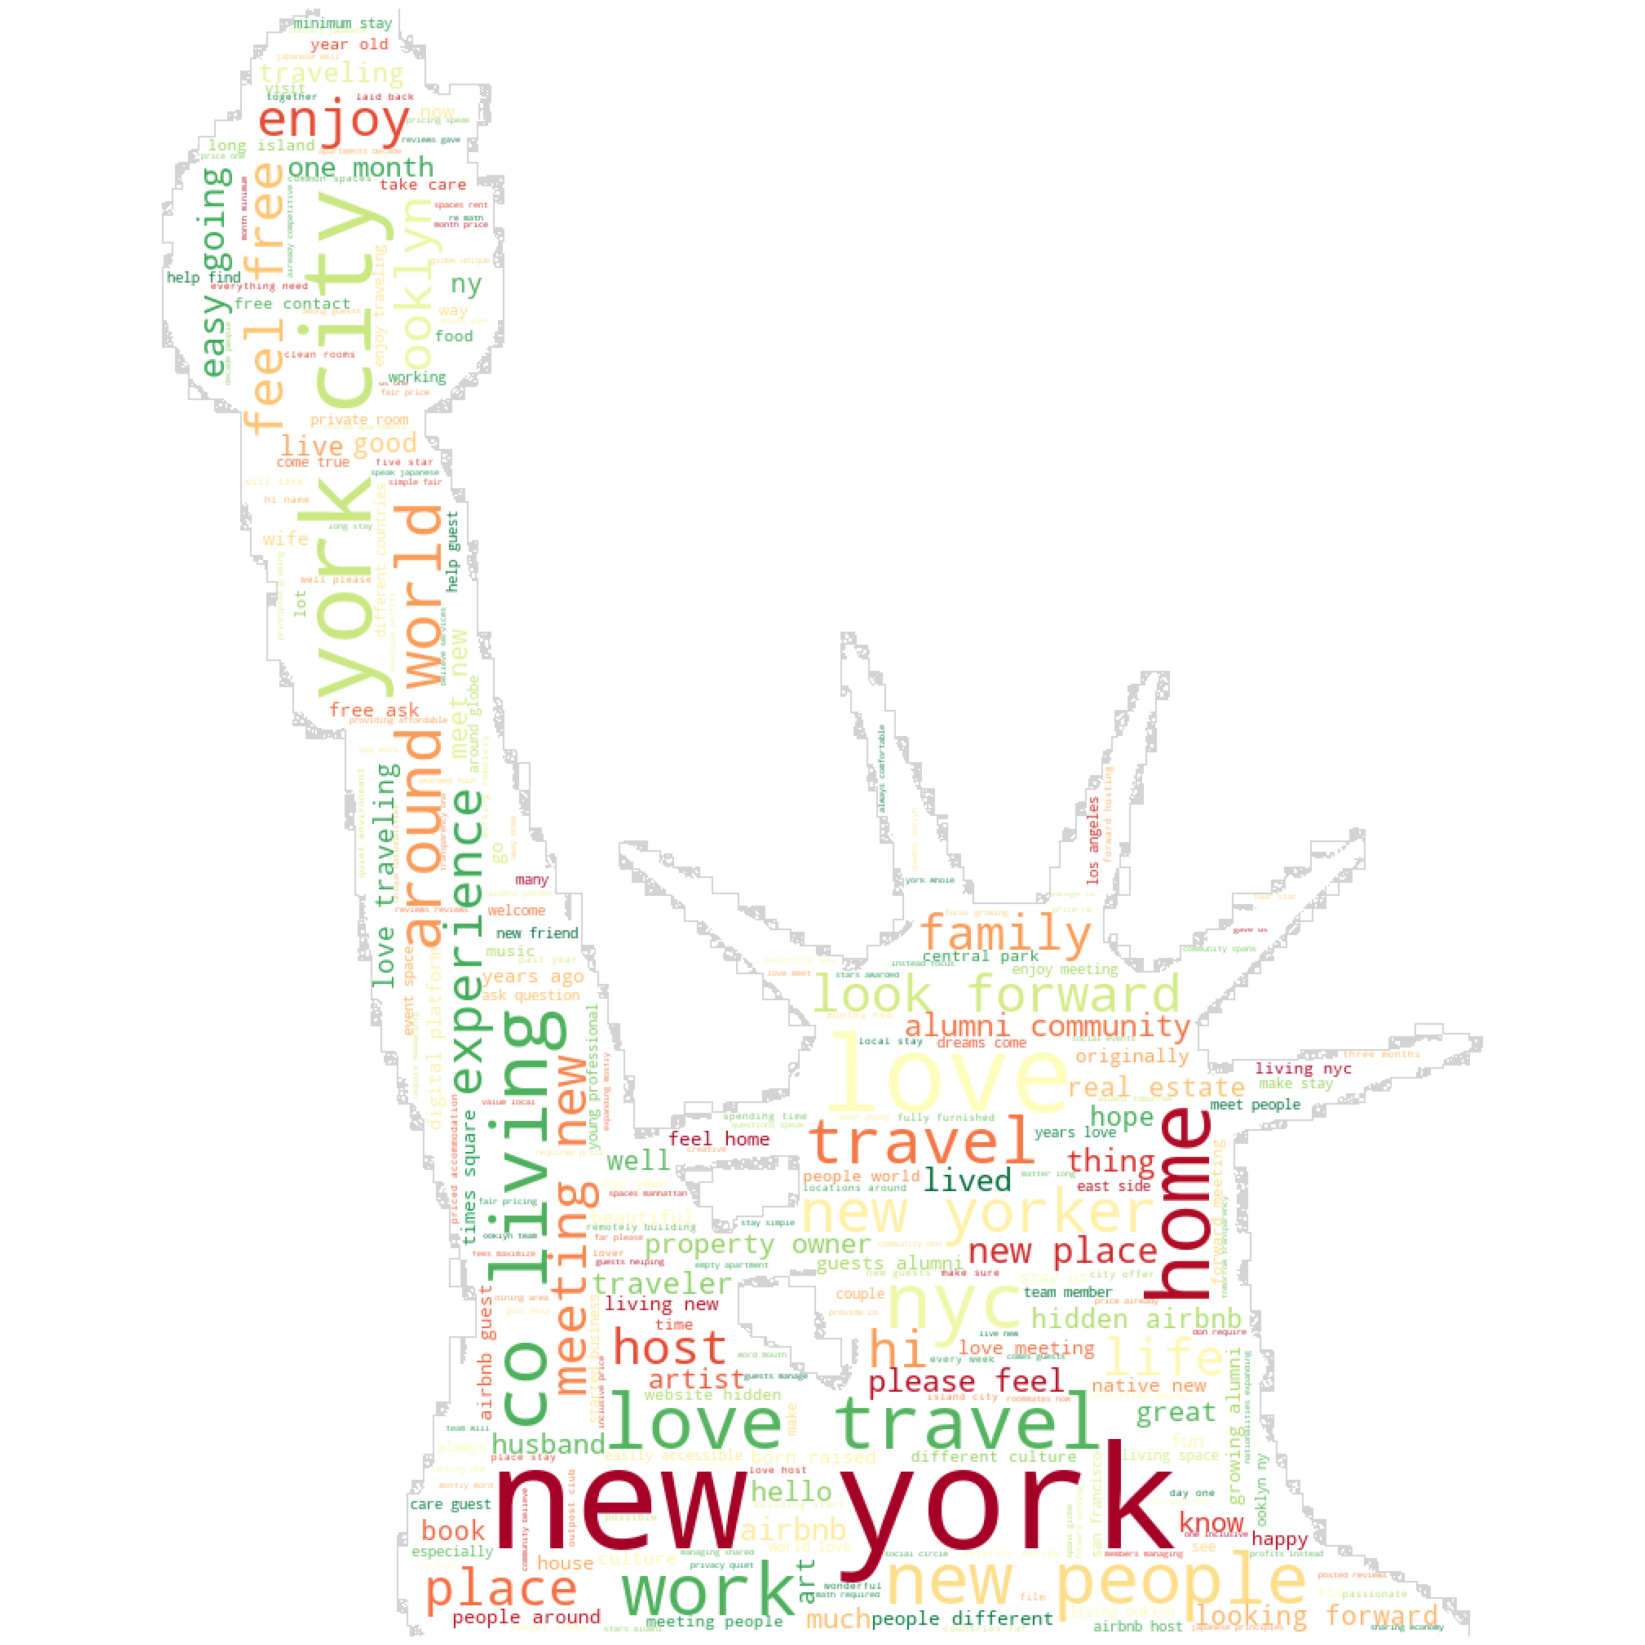

In [74]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['host_about']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("liberty_statue.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=1000,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 


# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
plt.savefig("wordcloud_host_about")
plt.show()

The word cloud for "name", <br>
which can help us to get the most popular words for hosts to entitle thier Airbnb apartments.

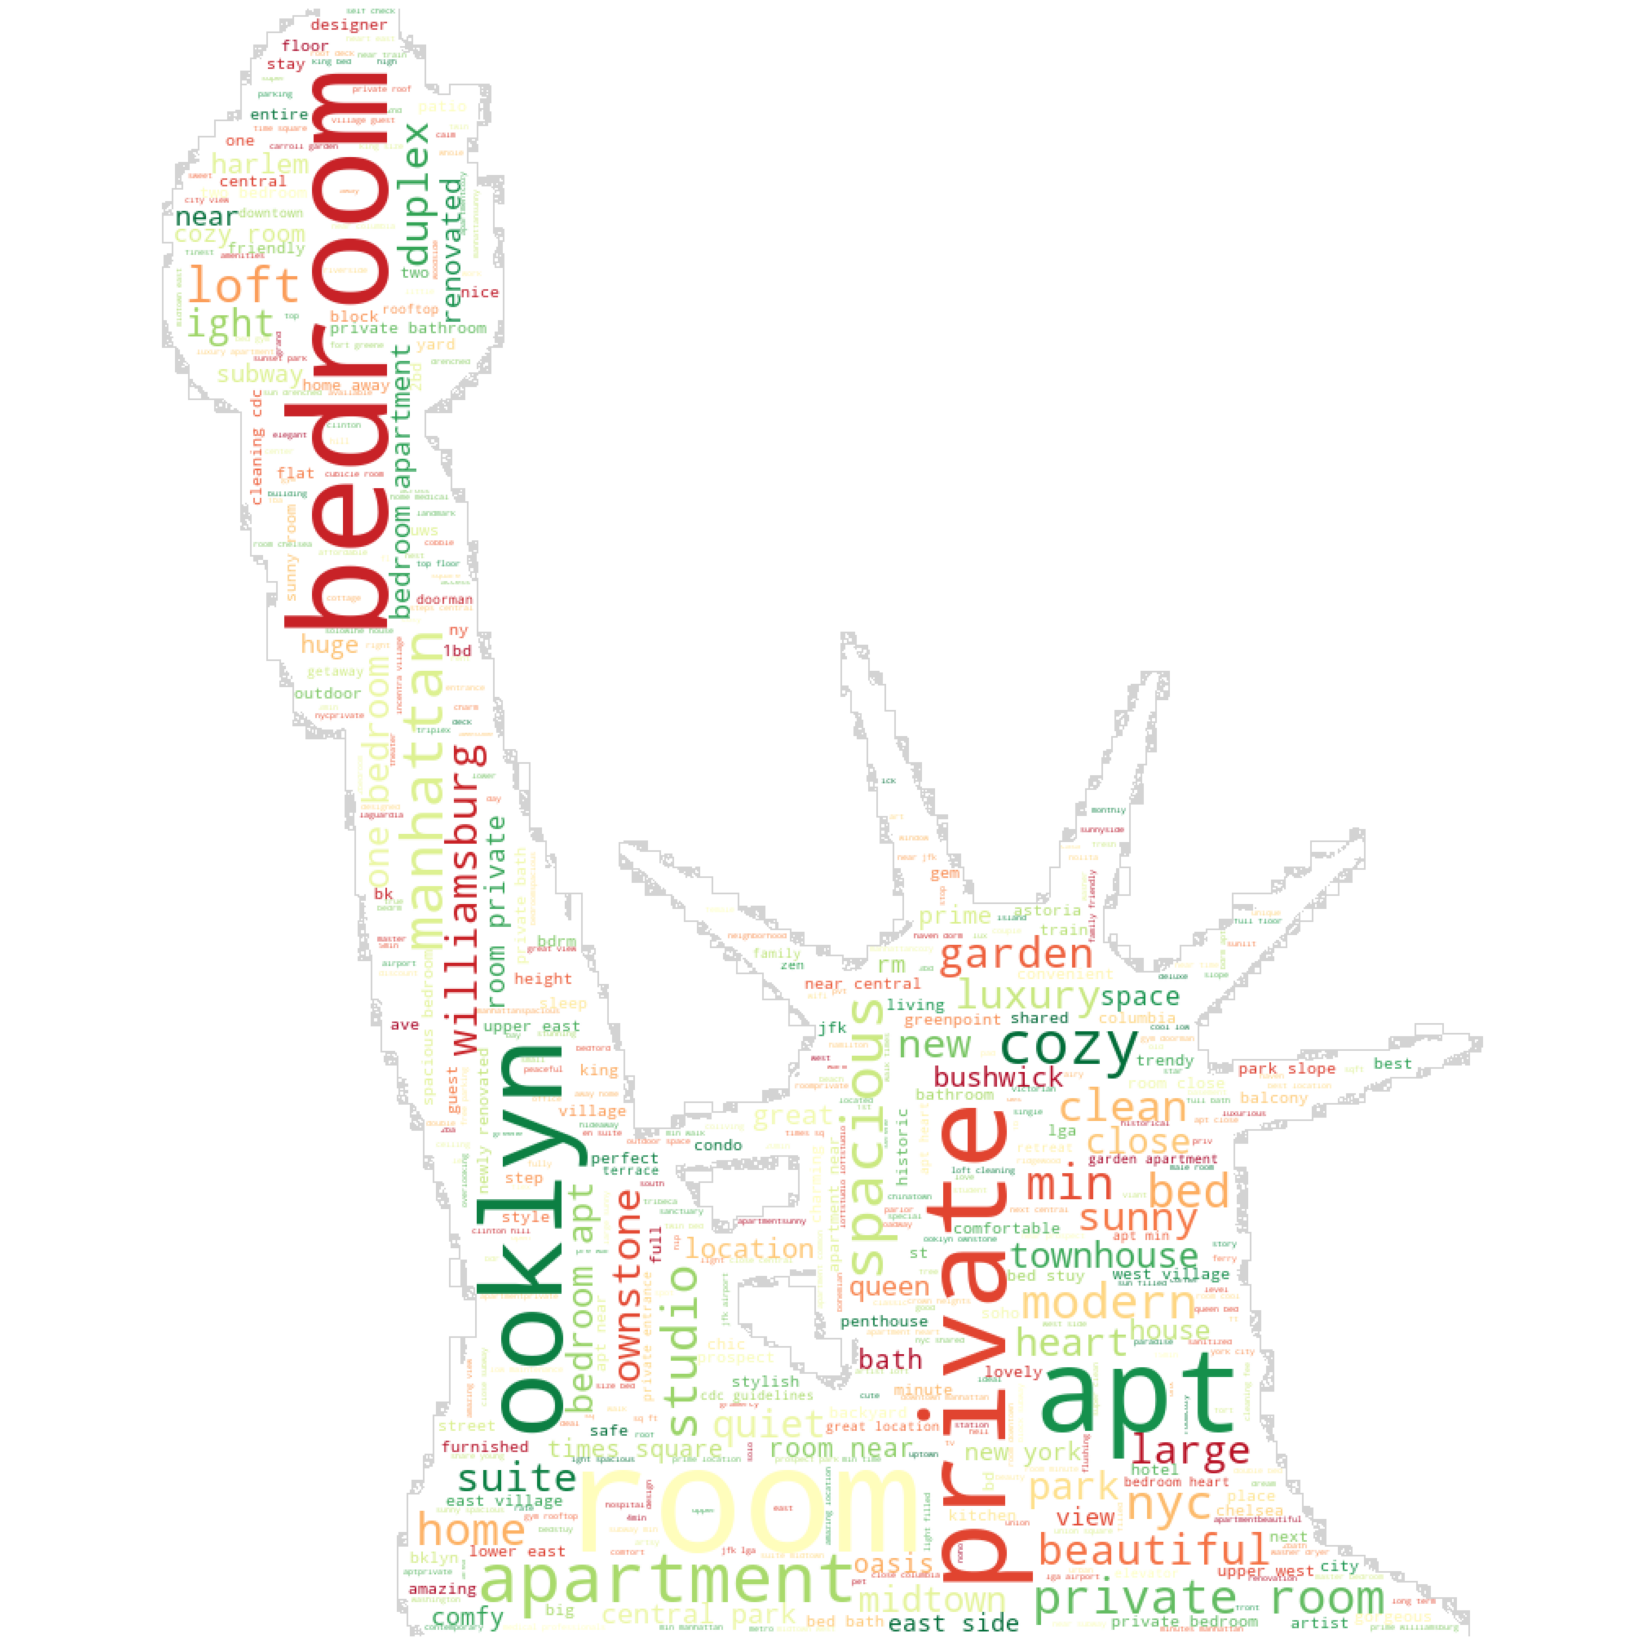

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['name']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("liberty_statue.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=1000,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
plt.savefig("wordcloud_name")
plt.show()

### 2. Geographic Distribution

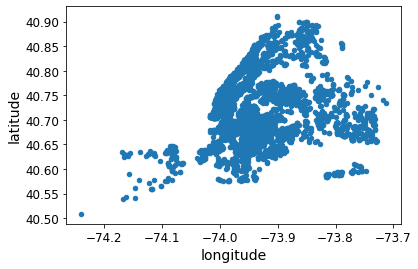

In [77]:
df1.plot(kind="scatter", x="longitude", y="latitude")
plt.savefig("bad_visualization_plot")

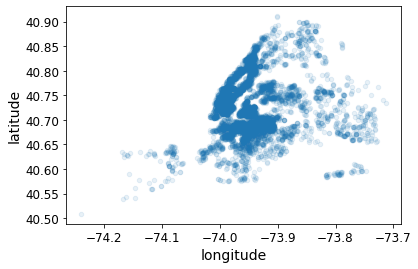

In [78]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.savefig("better_visualization_plot")

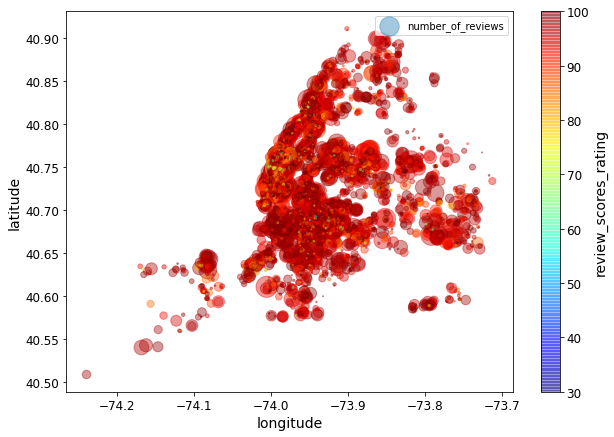

In [79]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df1["number_of_reviews"], label="number_of_reviews", figsize=(10,7),
    c="review_scores_rating", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.savefig("Airbnb_review_rating_scatterplot")

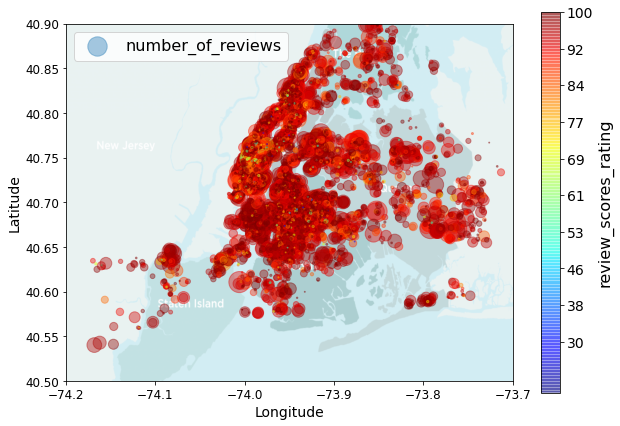

In [83]:
import matplotlib.image as mpimg
california_img=mpimg.imread('map_nyc.png')
ax = df1.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=df1["number_of_reviews"], label="number_of_reviews",
                       c="review_scores_rating", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-74.2, -73.7, 40.5, 40.90], alpha=0.4,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

rating = df1["review_scores_rating"]
tick_values = np.linspace(rating.min(), rating.max(), 10)
cbar = plt.colorbar(ticks=tick_values/rating.max())
cbar.ax.set_yticklabels([(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('review_scores_rating', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("Montreal_Airbnb_review_rating_scatterplot")
plt.show()

### 3. Get the correlation value between target variable ("review_scores_rating") and other predictors

In [87]:
corr_matrix2 = df1.corr()

In [88]:
corr_matrix2["review_scores_rating"].sort_values(ascending=False)

review_scores_rating         1.000000
host_is_superhost            0.278963
amenities_length             0.167810
host_since_days              0.111430
price_per_accommodates       0.097599
has_Hair_dryer               0.090977
host_response_rate           0.077282
verifications_length         0.068575
price                        0.064726
description_length           0.053203
number_of_reviews            0.041081
longitude                    0.036754
name_length                  0.031783
reviews_per_month            0.029780
bedrooms                     0.018988
first_reviews_days           0.012917
beds                        -0.002879
number_of_reviews_l30d      -0.008087
accommodates                -0.010573
host_identity_verified      -0.016329
host_about_length           -0.017769
minimum_nights              -0.031950
host_total_listings_count   -0.036696
latitude                    -0.041689
host_acceptance_rate        -0.043134
maximum_nights              -0.068417
last_review_

In [89]:
corr_matrix["review_scores_rating"].sort_values(ascending=False)

review_scores_rating         1.000000
number_of_reviews            0.054595
reviews_per_month            0.041548
bedrooms                     0.010334
number_of_reviews_l30d       0.005152
accommodates                -0.006905
beds                        -0.011301
maximum_nights              -0.013451
longitude                   -0.015705
minimum_nights              -0.025785
latitude                    -0.031618
host_total_listings_count   -0.032321
Name: review_scores_rating, dtype: float64

### Compare the correlation value before and after adding new features, we can see that the new feature of "amenities_length","price_per_accommodates" and "has_hair_dryer" are all the predictors have the high correlation with the target variable

### 4. Draw the scatter matrix plot for the top 4 correlated varibles with review_scores_rating

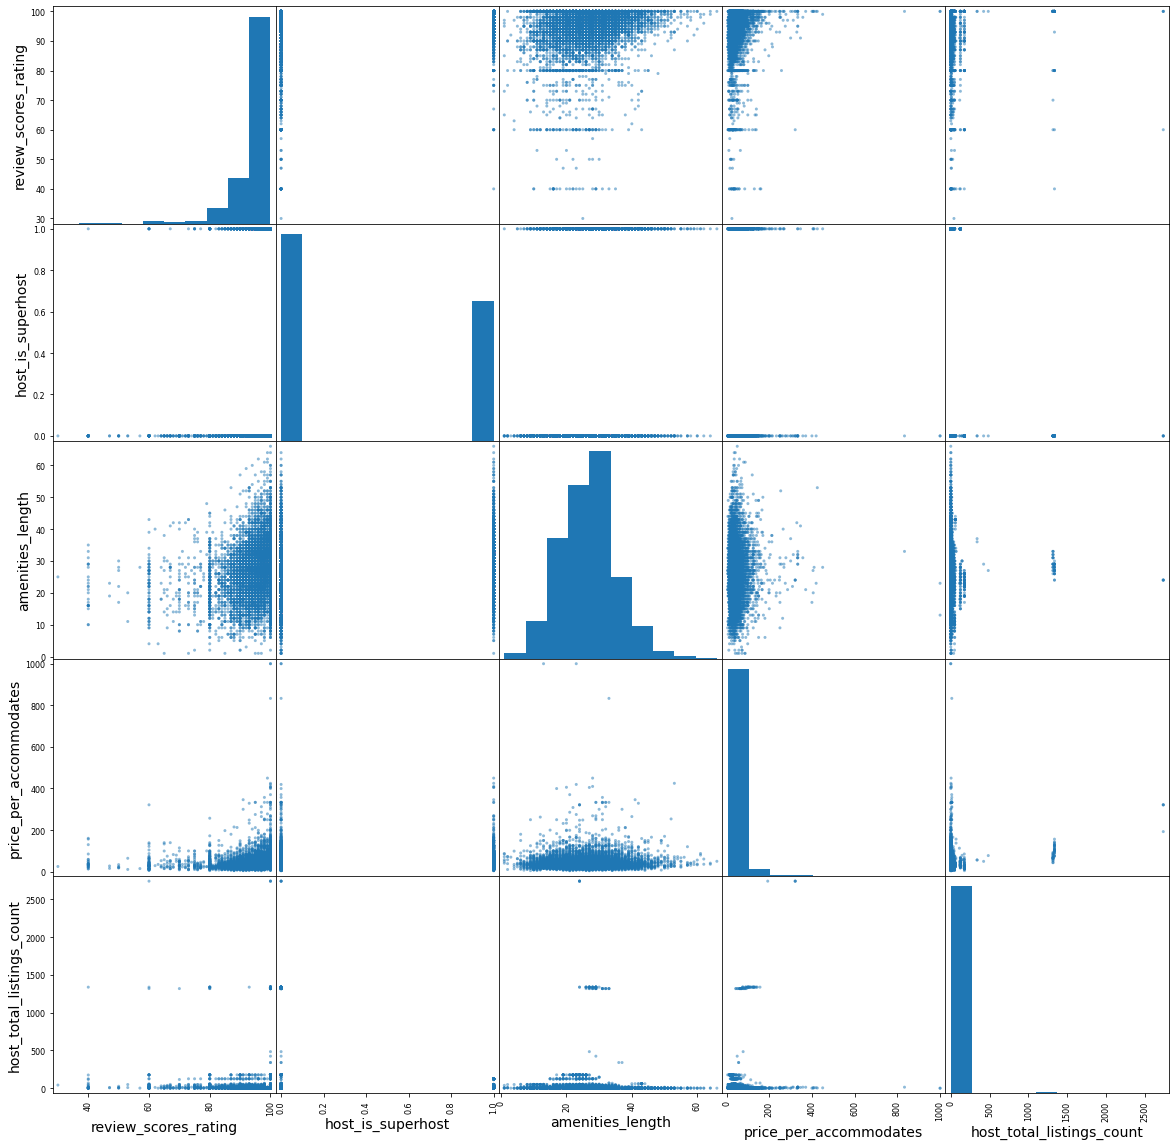

In [92]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["review_scores_rating", "host_is_superhost", "amenities_length",
              "price_per_accommodates",'host_total_listings_count']
scatter_matrix(df1[attributes], figsize=(20, 20))
plt.savefig("scatter_matrix_plot")

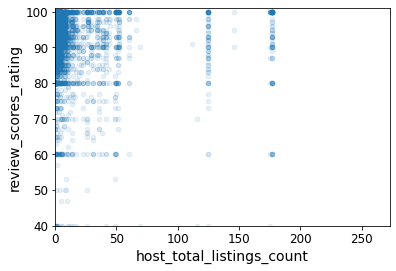

In [93]:
df1.plot(kind="scatter", x="host_total_listings_count", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
plt.savefig("listing_counts_vs_rating_scatterplot")

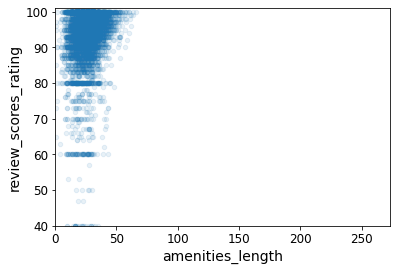

In [94]:
df1.plot(kind="scatter", x="amenities_length", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
plt.savefig("income_vs_house_value_scatterplot")

In [95]:
df1.describe()

host_response_rate  ...  has_Hair_dryer
count         7831.000000  ...     7831.000000
mean             0.918087  ...        0.807432
std              0.204328  ...        0.394342
min              0.000000  ...        0.000000
25%              0.960000  ...        1.000000
50%              1.000000  ...        1.000000
75%              1.000000  ...        1.000000
max              1.000000  ...        1.000000

[8 rows x 28 columns]

# ML models

## Semi-Supervised Model

In [336]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.semi_supervised import LabelSpreading

### To mask data to labeled and unlabeled

In [260]:
import numpy as np
import random

In [387]:
from sklearn.metrics import mean_squared_error
from numpy import concatenate
def runLP(x,target,x_test,target_test,n):
        

    data = x
    labels = target

    X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(data, labels, test_size=n, random_state=123)
    #RUN THE MODEL
    X_train_mixed = concatenate((X_train_lab, X_test_unlab))
    # create "no label" for unlabeled data
    nolabel = [-1 for _ in range(len(y_test_unlab))]
    # recombine training dataset labels
    y_train_mixed = concatenate((y_train_lab, nolabel))
    print(y_train_mixed)
    model = LabelSpreading(max_iter=100)
    model.fit(X_train_mixed, y_train_mixed)
    pred = np.array(model.predict(x_test))
    #SEPARATE PREDICTED SAMPLES
    print(model.predict(x).sum())

    
    #PRINT CONFUSION MATRIX
    return model, mean_squared_error(target_test, pred),target_test,pred

In [276]:
train_set.columns

Index(['last_scraped', 'name', 'description', 'host_name', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'instant_bookable', 'reviews_per_month',
       'name_length', 'description_length', 'host_about_length',
       'verifications_length', 'amenities_length', 'host_since_days',
       'first_reviews_days', 'last_review_days', 'price_per_accommodates',
       'has_Hair_dryer', 'flag', 'host_response_time_indicator',
       'host_response_rate_indicator', 'host_acceptance_ra

In [278]:
train_set.describe().columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable',
       'reviews_per_month', 'name_length', 'description_length',
       'host_about_length', 'verifications_length', 'amenities_length',
       'host_since_days', 'first_reviews_days', 'last_review_days',
       'price_per_accommodates', 'has_Hair_dryer', 'flag',
       'host_response_time_indicator', 'host_response_rate_indicator',
       'host_acceptance_rate_indicator', 'bedrooms_indicator',
       'description_indicator', 'beds_indicator', 'bathrooms_text_indicator',
       'name_indicator'],
      dtype='object')

In [398]:
target=train_set['price']
x=train_set[train_set.describe().columns].drop(['price'],axis=1)
x=x.to_numpy()
target_test=test_set['price']
x_test=test_set[test_set.describe().columns].drop(['price'],axis=1)
x_test=x_test.to_numpy()

In [399]:
target_test.to_numpy()

array([ 31., 145.,  60., ..., 100.,  80.,  60.])

In [400]:
model, matrix,labels,pred=runLP(x,target,x_test,target_test,0.5)

[119. 106. 149. ...  -1.  -1.  -1.]
488667.0


In [401]:
pd.DataFrame(model.predict(x)).describe()

0
count  6916.000000
mean     70.657461
std     130.868069
min      10.000000
25%      10.000000
50%      10.000000
75%      95.000000
max    4500.000000

In [402]:
pd.DataFrame(labels).describe()

price
count  1730.000000
mean    142.910405
std     216.516897
min      18.000000
25%      60.000000
50%      95.000000
75%     150.000000
max    4000.000000

In [403]:
pd.DataFrame(pred).describe()

0
count  1730.000000
mean     10.365896
std      15.218809
min      10.000000
25%      10.000000
50%      10.000000
75%      10.000000
max     643.000000

## Auto ML

In [484]:
import h2o
from h2o.automl import H2OAutoML
# initialize the h2o session
h2o.init()
# load an h2o DataFrame from pandas DataFrame.



Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ---------------------------------------------------------
H2O_cluster_uptime:         3 hours 36 mins
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.1
H2O_cluster_version_age:    6 days
H2O_cluster_name:           H2O_from_python_fandi_0vhl0l
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.645 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.4 final
--------------------------  ---------------------------------------------------------

In [485]:
train_set=train_set.drop(train_set.iloc[:, 44:52], axis=1)
test_set=test_set.drop(test_set.iloc[:, 44:52], axis=1)
train_set=train_set[list(train_set.describe().columns)]
test_set=test_set[list(test_set.describe().columns)]

In [486]:
train_set.to_csv('for_automl_train.csv')

In [487]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6916 entries, 5045 to 28777
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         6916 non-null   float64
 1   host_acceptance_rate       6916 non-null   float64
 2   host_is_superhost          6916 non-null   float64
 3   host_total_listings_count  6916 non-null   float64
 4   host_identity_verified     6916 non-null   float64
 5   latitude                   6916 non-null   float64
 6   longitude                  6916 non-null   float64
 7   accommodates               6916 non-null   float64
 8   bedrooms                   6916 non-null   float64
 9   beds                       6916 non-null   float64
 10  price                      6916 non-null   float64
 11  minimum_nights             6916 non-null   float64
 12  maximum_nights             6916 non-null   float64
 13  number_of_reviews          6916 non-null   f

In [488]:
train_set.describe().columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable',
       'reviews_per_month', 'name_length', 'description_length',
       'host_about_length', 'verifications_length', 'amenities_length',
       'host_since_days', 'first_reviews_days', 'last_review_days',
       'price_per_accommodates', 'has_Hair_dryer', 'flag'],
      dtype='object')

In [489]:
df_test = h2o.import_file('for_automl_train.csv')

x = list(train_set.describe().columns)
x.remove('price')
x.remove('price_per_accommodates')# remove the target
aml = H2OAutoML(max_models=10, seed=1)

In [490]:
pred=aml.train(x=x, y='price', training_frame=df_test)
lb = aml.leaderboard # Leader board
print(lb.head(rows=lb.nrows)) # print leader board

Exception ignored in: <_io.FileIO name='C:\\Users\\fandi\\AppData\\Local\\Temp\\tmp5o2e2qxr.csv' mode='rb' closefd=True>



02:17:25.295: AutoML: XGBoost is not available; skipping it.



Exception ignored in: <_io.FileIO name='C:\\Users\\fandi\\AppData\\Local\\Temp\\tmp05r96v5m.csv' mode='rb' closefd=True>
Exception ignored in: <_io.FileIO name='C:\\Users\\fandi\\AppData\\Local\\Temp\\tmpnk1szb0q.csv' mode='rb' closefd=True>
Exception ignored in: <_io.FileIO name='C:\\Users\\fandi\\AppData\\Local\\Temp\\tmphzcg8tkz.csv' mode='rb' closefd=True>
Exception ignored in: <_io.FileIO name='C:\\Users\\fandi\\AppData\\Local\\Temp\\tmpf8ghqoo3.csv' mode='rb' closefd=True>


model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_AllModels_AutoML_20210401_021725 14663.1 121.091 14663.1 50.0542 0.44198 
 GBM_3_AutoML_20210401_021725 14910.9 122.11 14910.9 51.482 nan 
 StackedEnsemble_BestOfFamily_AutoML_20210401_021725 14987.6 122.424 14987.6 50.579 0.444617 
 GBM_2_AutoML_20210401_021725 15316.2 123.759 15316.2 51.7444 nan 
 GBM_4_AutoML_20210401_021725 15332.9 123.826 15332.9 51.5131 0.454216 
 GBM_1_AutoML_20210401_021725 15372.4 123.985 15372.4 51.0422 0.453119 
 XRT_1_AutoML_20210401_021725 15592.2 124.869 15592.2 51.5199 0.449215 
 DRF_1_AutoML_20210401_021725 15822.8 125.789 15822.8 51.7183 0.447261 
 GBM_grid__1_AutoML_20210401_021725_model_1 15877 126.004 15877 53.3824 0.477162 
 GBM_5_AutoML_20210401_021725 16472 128.343 16472 52.5087 0.464601 
 DeepLearning_1_AutoML_20210401_021725 18156.2 134.745 18156.2 58.9991 nan 
 GLM_1_AutoML_20210401_021725 18670.3 136.639 18670.3 61.8797 nan

In [491]:
test_set.to_csv('for_automl_test.csv')

In [492]:
test = h2o.import_file('for_automl_test.csv')
preds = aml.predict(test)

In [493]:
preds

predict 
 
 
 20.3769 
 114.181 
 86.8901 
 57.6202 
 79.3904 
 365.139 
 119.684 
 125.404 
 114.845 
 168.988

In [494]:
list_model=h2o.as_list(lb.head(rows=lb.nrows)['model_id'], use_pandas=False)

In [495]:
import itertools

list_m = list(itertools.chain(*list_model))

In [496]:
list_m

['model_id',
 'StackedEnsemble_AllModels_AutoML_20210401_021725',
 'GBM_3_AutoML_20210401_021725',
 'StackedEnsemble_BestOfFamily_AutoML_20210401_021725',
 'GBM_2_AutoML_20210401_021725',
 'GBM_4_AutoML_20210401_021725',
 'GBM_1_AutoML_20210401_021725',
 'XRT_1_AutoML_20210401_021725',
 'DRF_1_AutoML_20210401_021725',
 'GBM_grid__1_AutoML_20210401_021725_model_1',
 'GBM_5_AutoML_20210401_021725',
 'DeepLearning_1_AutoML_20210401_021725',
 'GLM_1_AutoML_20210401_021725']

## Model Explainability

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

Exception ignored in: <_io.FileIO name='C:\\Users\\fandi\\AppData\\Local\\Temp\\tmpttbpz680.csv' mode='rb' closefd=True>


model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_AutoML_20210401_021725 14663.1 121.091 14663.1 50.0542 0.44198 373 0.037693 StackedEnsemble 
 GBM_3_AutoML_20210401_021725 14910.9 122.11 14910.9 51.482 nan 922 0.010295 GBM 
 StackedEnsemble_BestOfFamily_AutoML_20210401_021725 14987.6 122.424 14987.6 50.579 0.444617 330 0.03334 StackedEnsemble 
 GBM_2_AutoML_20210401_021725 15316.2 123.759 15316.2 51.7444 nan 860 0.012269 GBM 
 GBM_4_AutoML_20210401_021725 15332.9 123.826 15332.9 51.5131 0.454216 1294 0.01103 GBM 
 GBM_1_AutoML_20210401_021725 15372.4 123.985 15372.4 51.0422 0.453119 990 0.010728 GBM 
 XRT_1_AutoML_20210401_021725 15592.2 124.869 15592.2 51.5199 0.449215 5763 0.018879 DRF 
 DRF_1_AutoML_20210401_021725 15822.8 125.789 15822.8 51.7183 0.447261 4883 0.017308 DRF 
 GBM_grid__1_AutoML_20210401_021725_model_1 15877 126.004 15877 53.3824 0.477162 577 0.006512 GBM 
 GBM_5_AutoML_20210401_021725 16472 128.343 16472 52.5087 0.464601 1509 0.013579 GBM 
 DeepLearning_1_AutoML_20210401_021725 18156.2 134.745 18156.2 58.9991 nan 530 0.002372 DeepLearning 
 GLM_1_AutoML_20210401_021725 18670.3 136.639 18670.3 61.8797 nan 274 0.000423 GLM

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

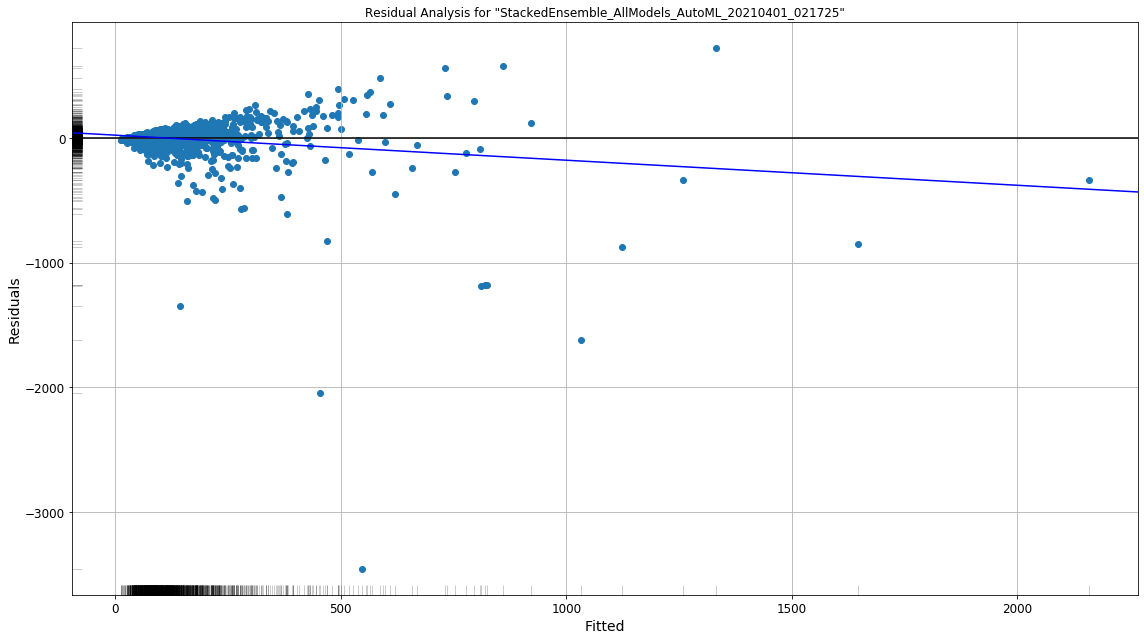

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

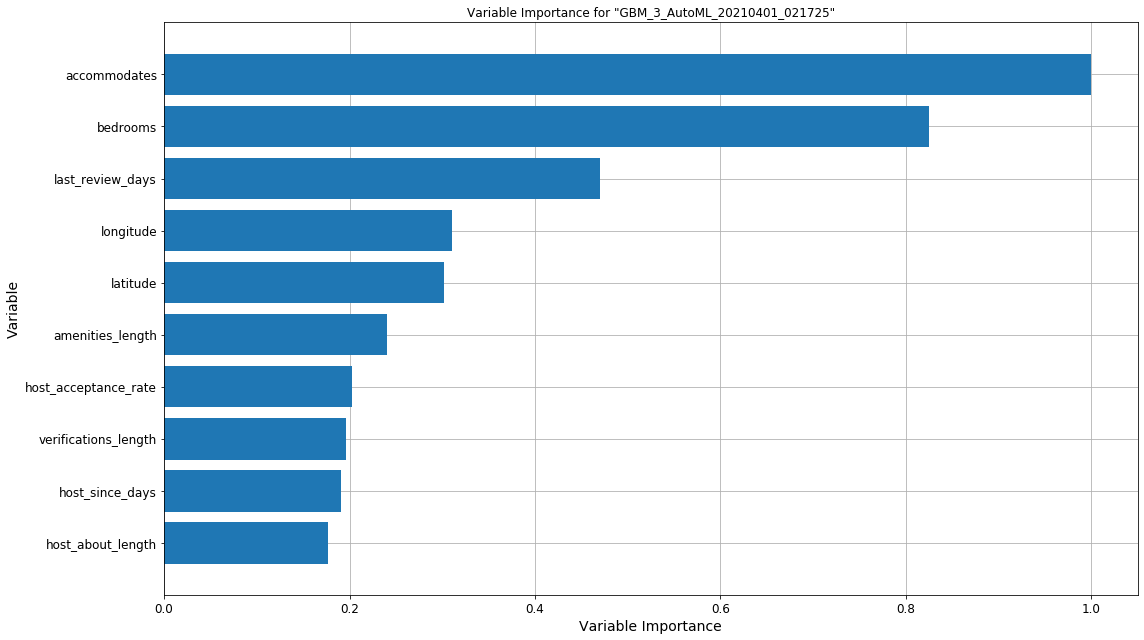

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

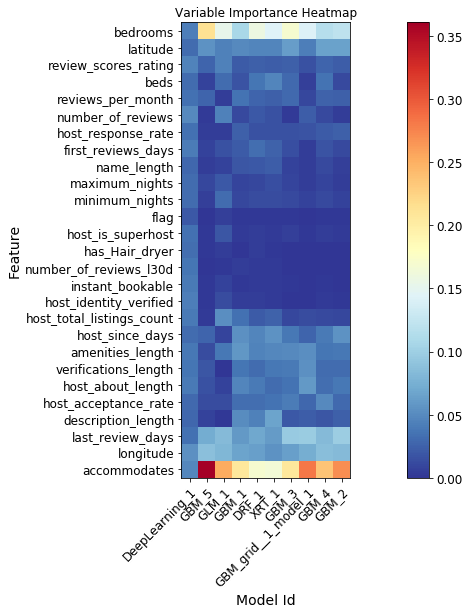

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

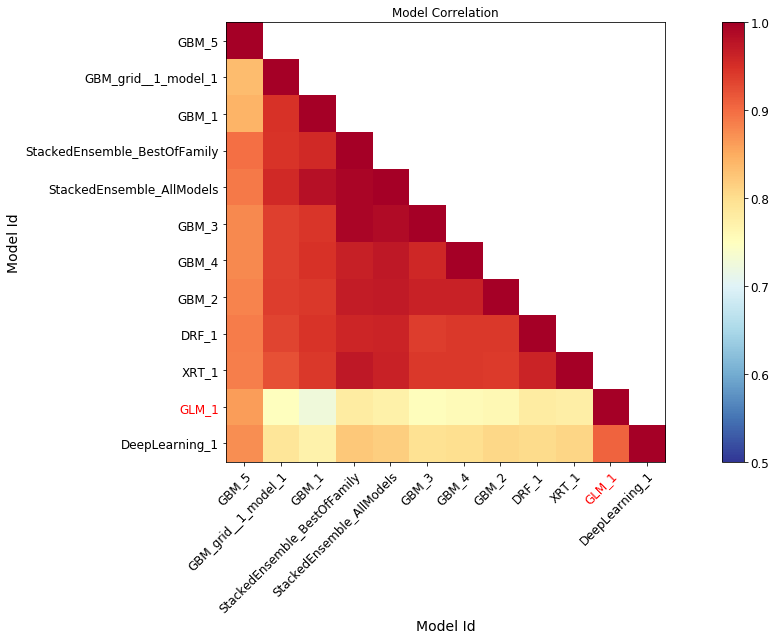

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

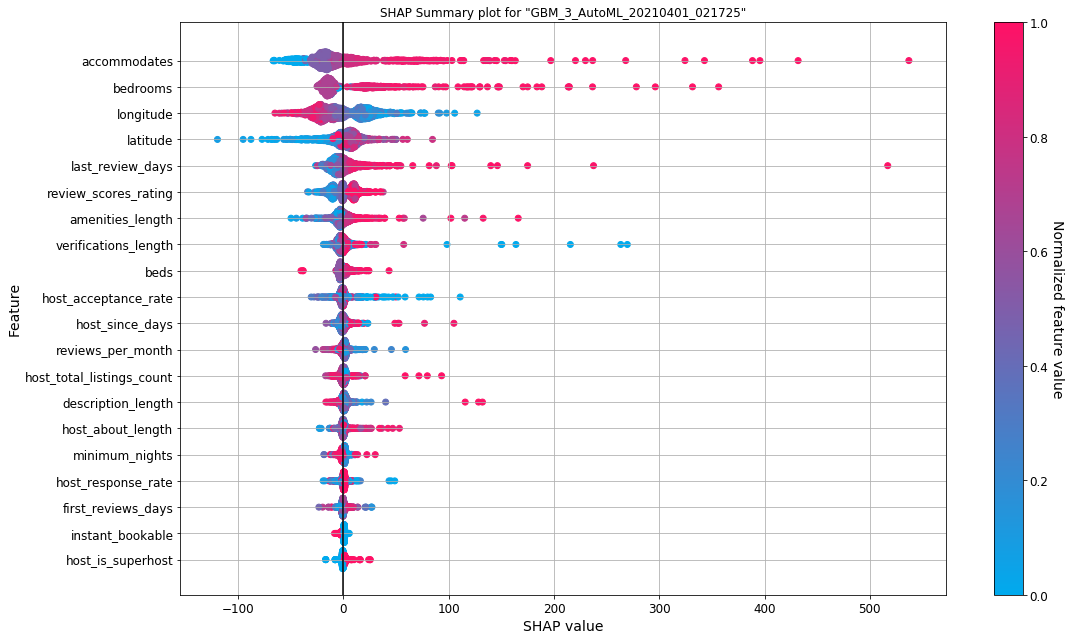

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

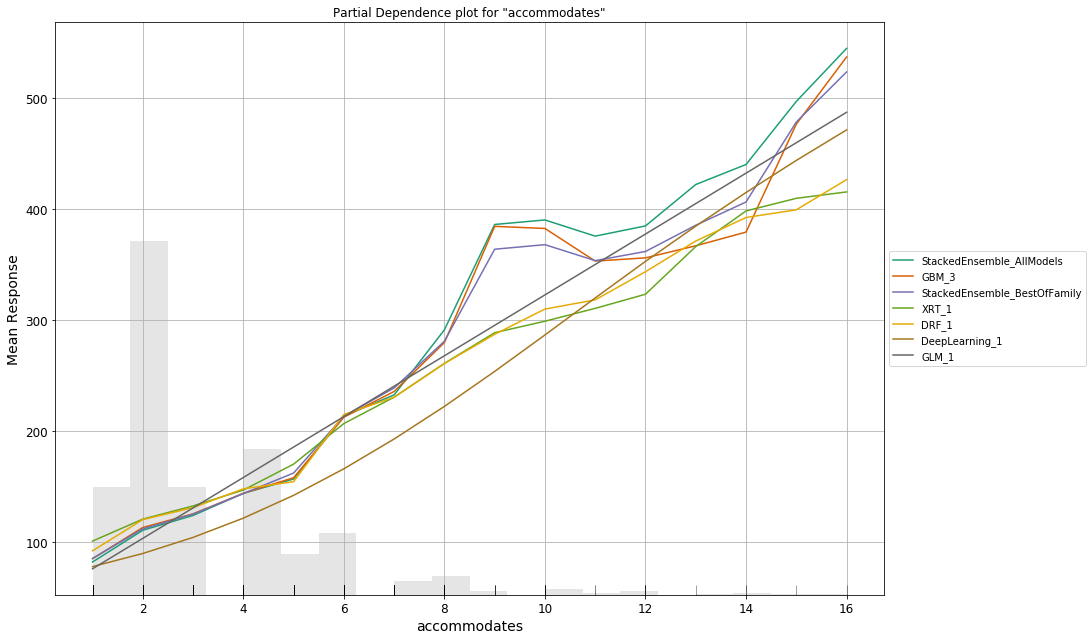

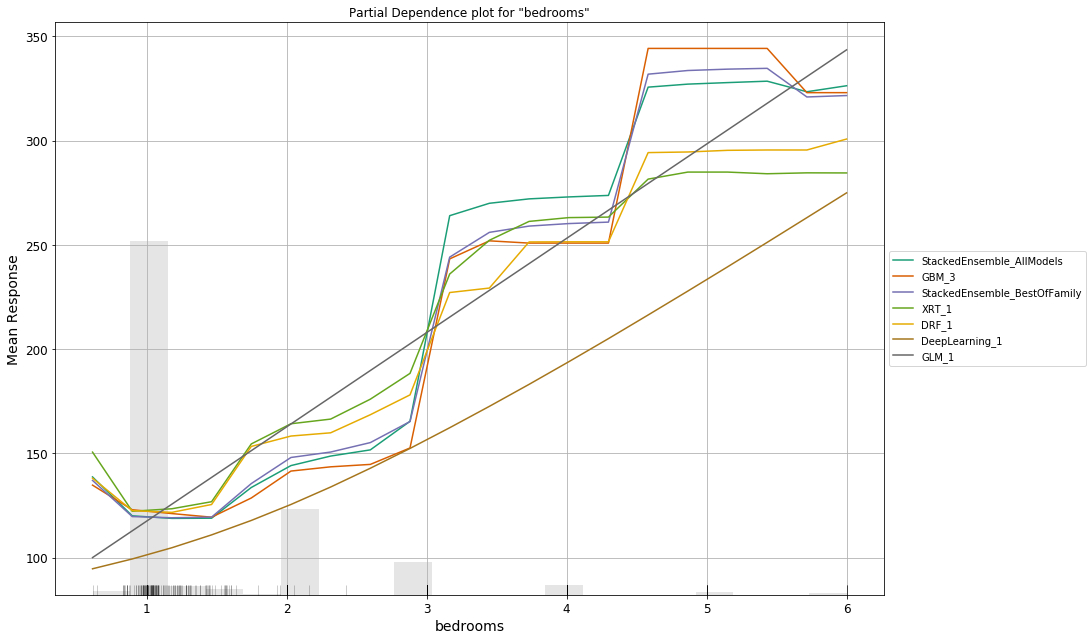

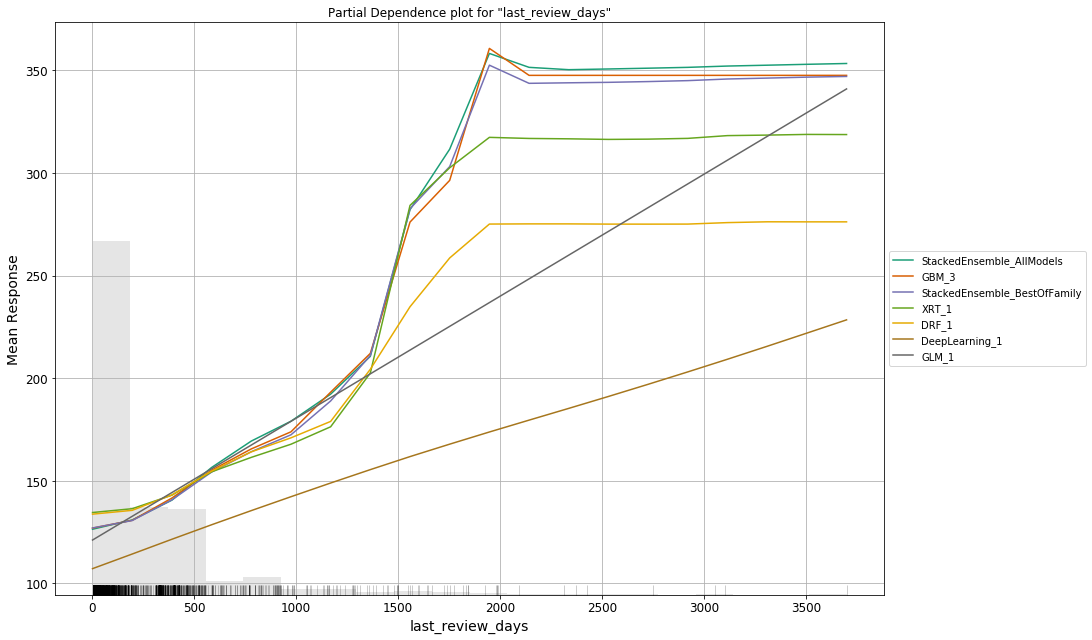

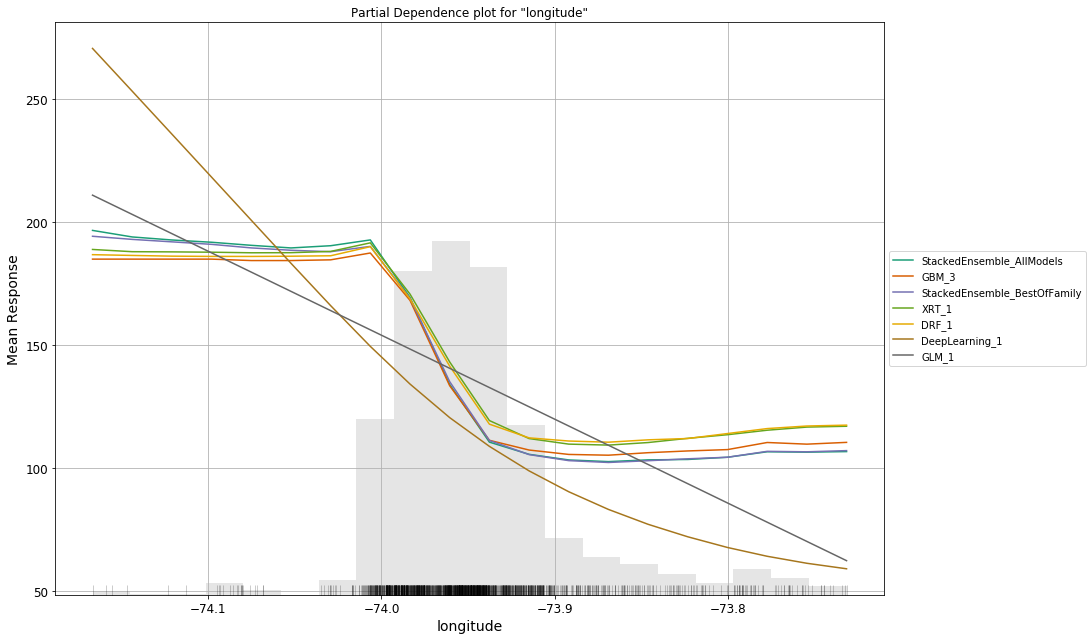

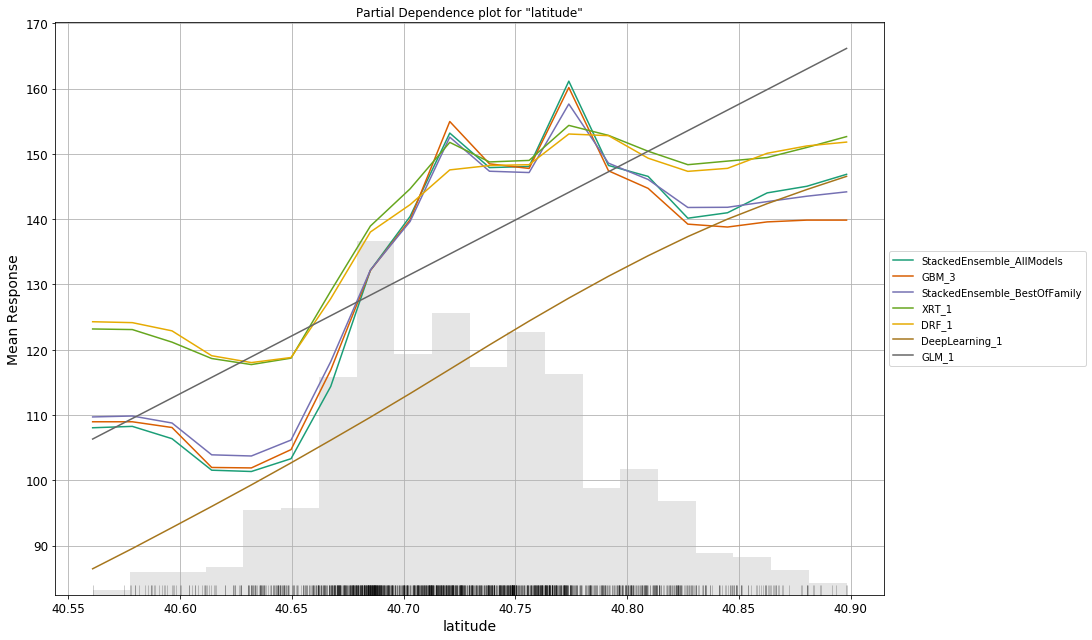

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

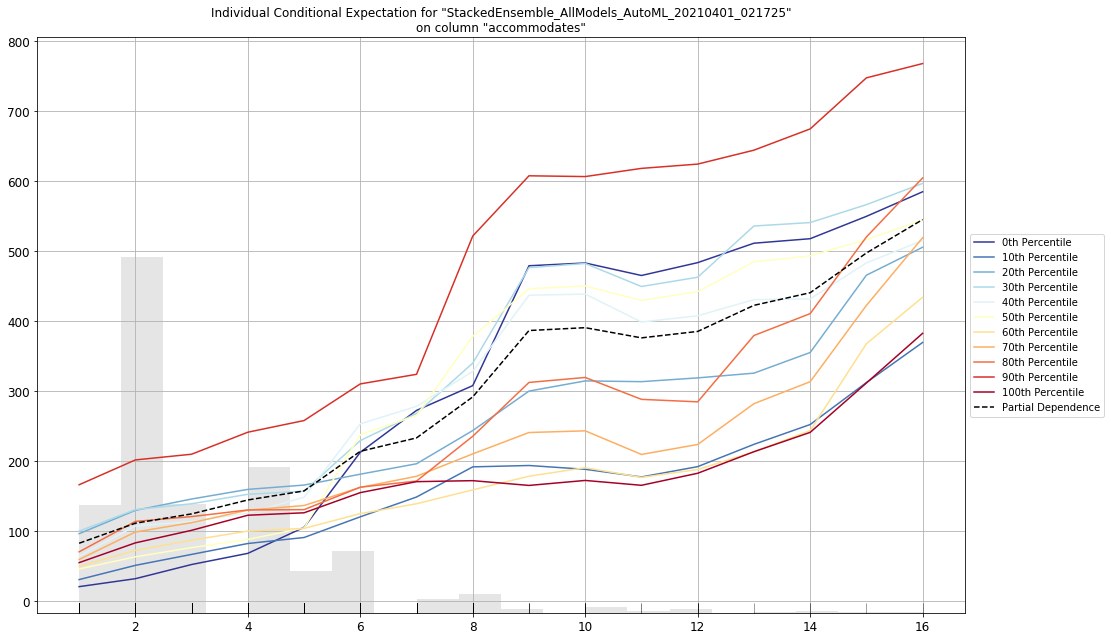

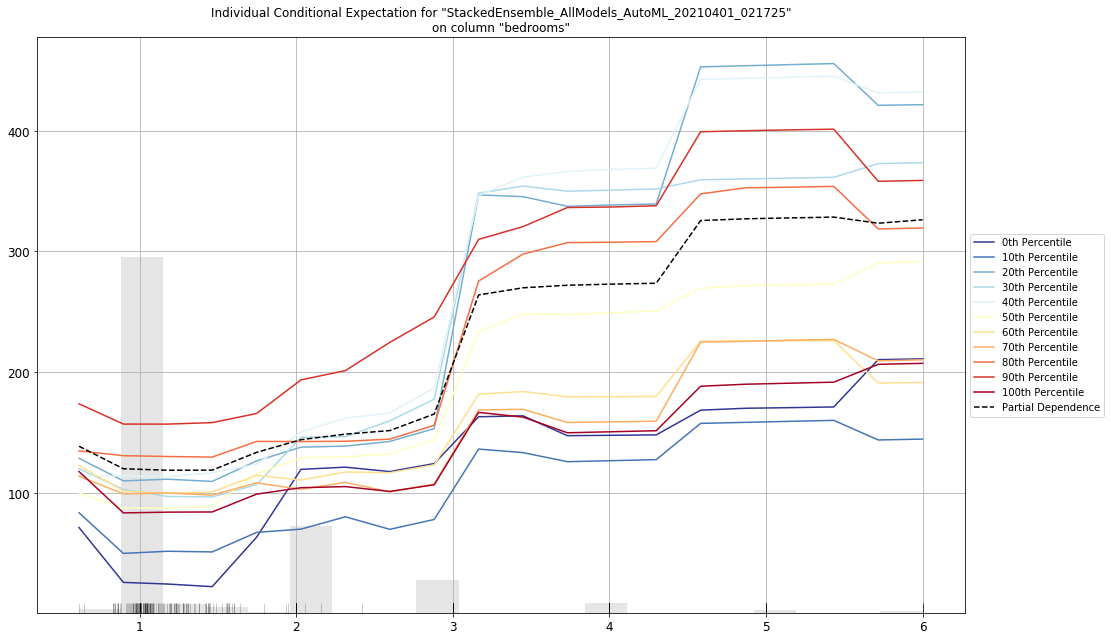

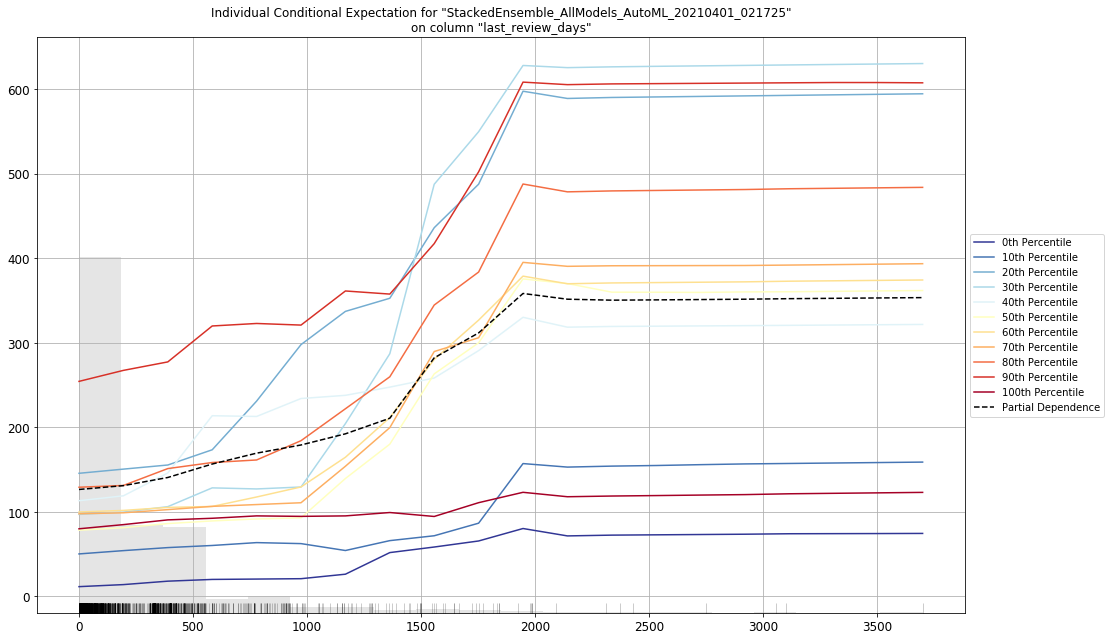

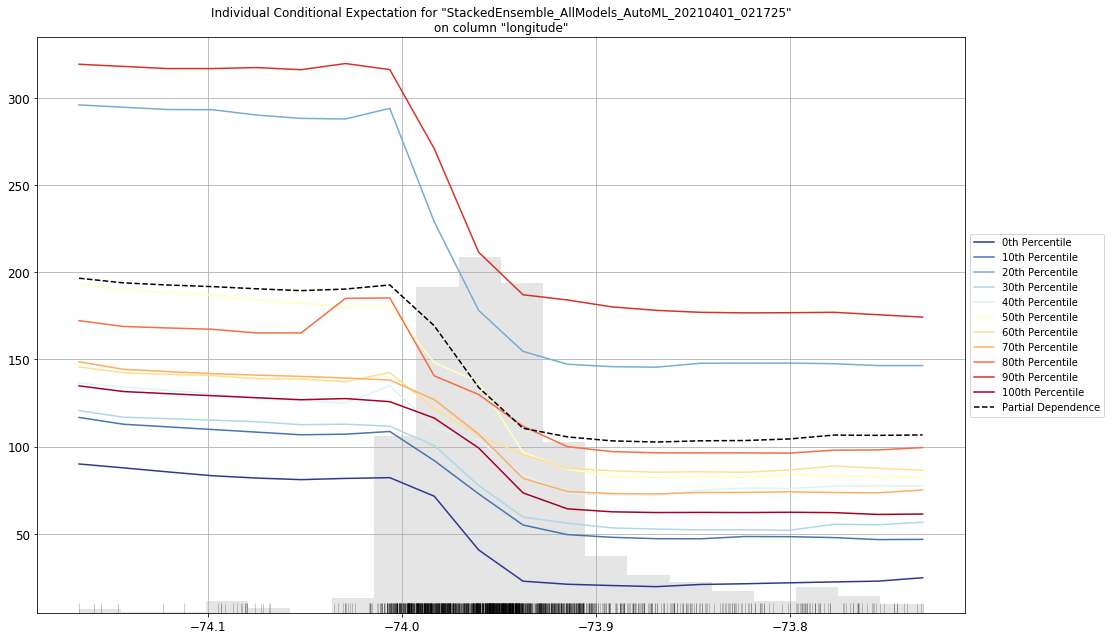

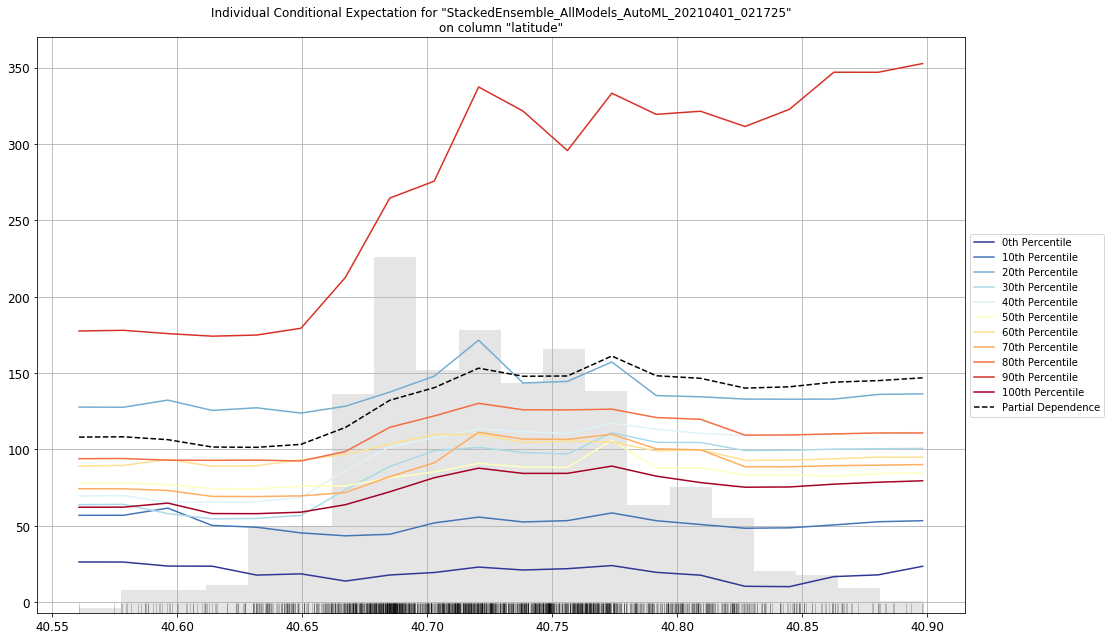

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_AutoML_20210401_021725 14663.1 121.091 14663.1 50.0542 0.44198 373 0.037693 StackedEnsemble 
 GBM_3_AutoML_20210401_021725 14910.9 122.11 14910.9 51.482 nan 922 0.010295 GBM 
 StackedEnsemble_BestOfFamily_AutoML_20210401_021725 14987.6 122.424 14987.6 50.579 0.444617 330 0.03334 StackedEnsemble 
 GBM_2_AutoML_20210401_021725 15316.2 123.759 15316.2 51.7444 nan 860 0.012269 GBM 
 GBM_4_AutoML_20210401_021725 15332.9 123.826 15332.9 51.5131 0.454216 1294 0.01103 GBM 
 GBM_1_AutoML_20210401_021725 15372.4 123.985 15372.4 51.0422 0.453119 990 0.010728 GBM 
 XRT_1_AutoML_20210401_021725 15592.2 124.869 15592.2 51.5199 0.449215 5763 0.018879 DRF 
 DRF_1_AutoML_20210401_021725 15822.8 125.789 15822.8 51.7183 0.447261 4883 0.017308 DRF 
 GBM_grid__1_AutoML_20210401_021725_model_1 15877 126.004 15877 53.3824 0.477162 577 0.006512 GBM 
 GBM_5_AutoML_20210401_021725 16472 128.343 16472 52.5087 0.464601 1509 0.013579 GBM 
 DeepLearning_1_AutoML_20210401_021725 18156.2 134.745 18156.2 58.9991 nan 530 0.002372 DeepLearning 
 GLM_1_AutoML_20210401_021725 18670.3 136.639 18670.3 61.8797 nan 274 0.000423 GLM

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

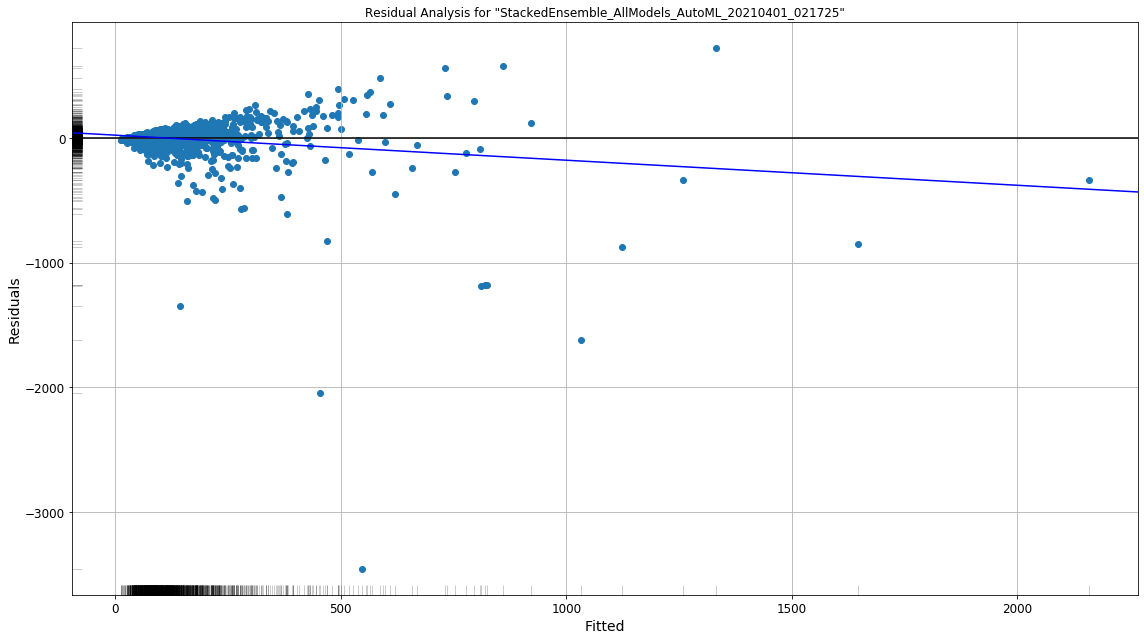

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

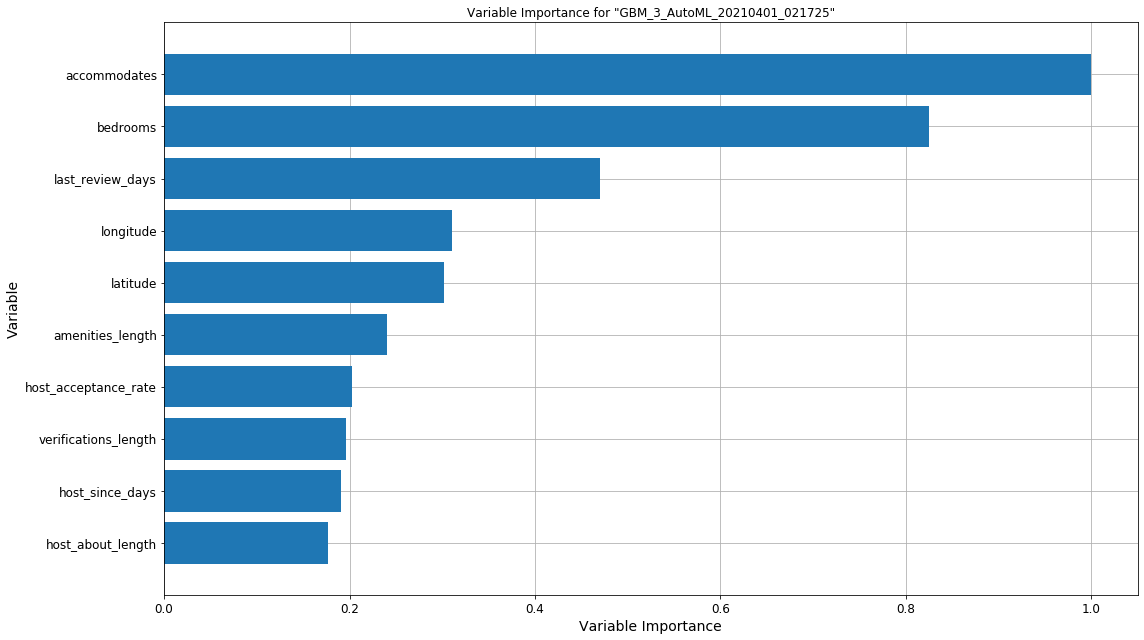

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

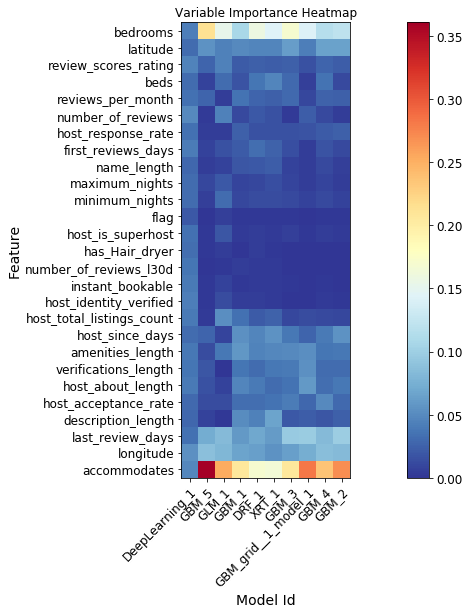

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

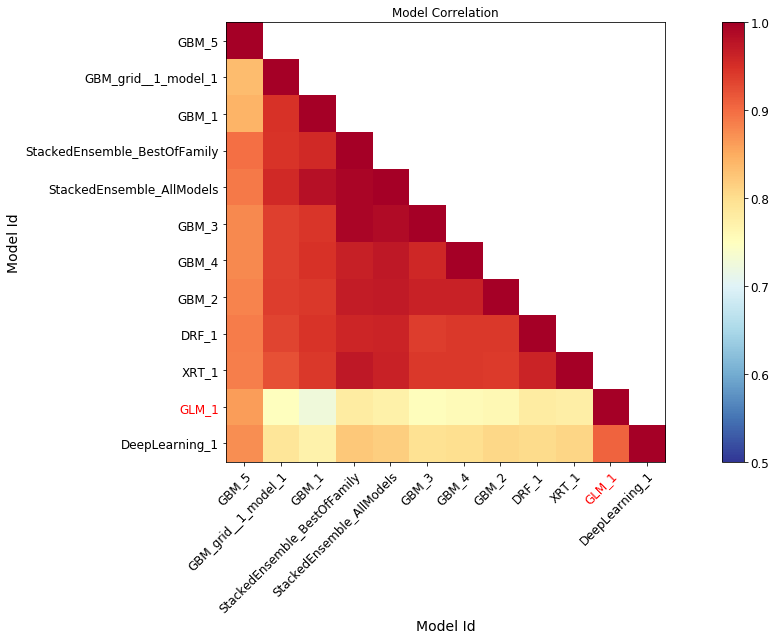

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

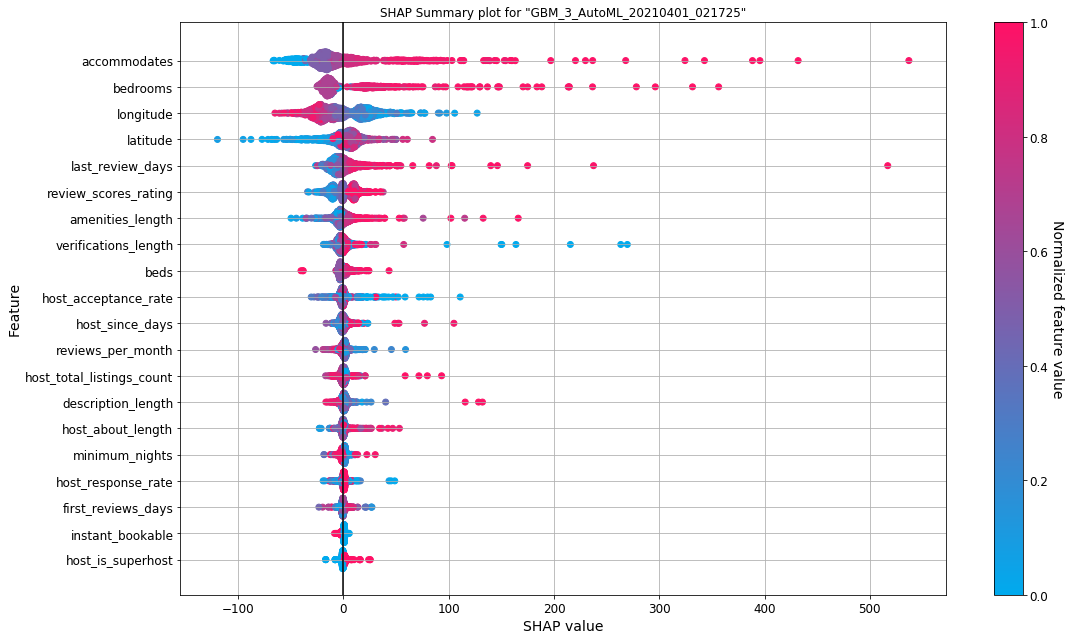

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

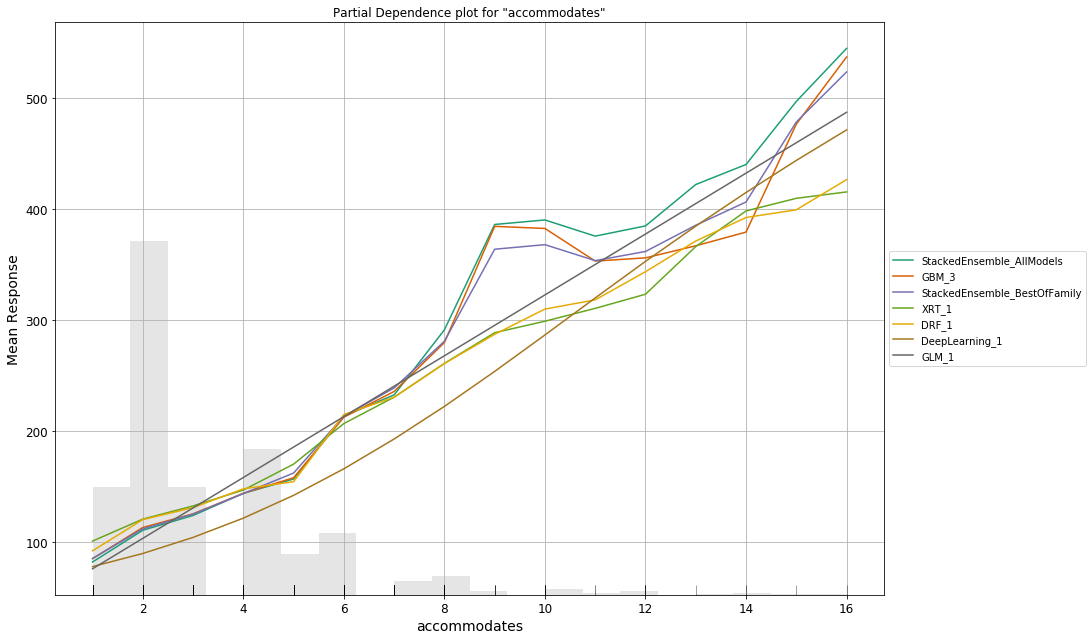

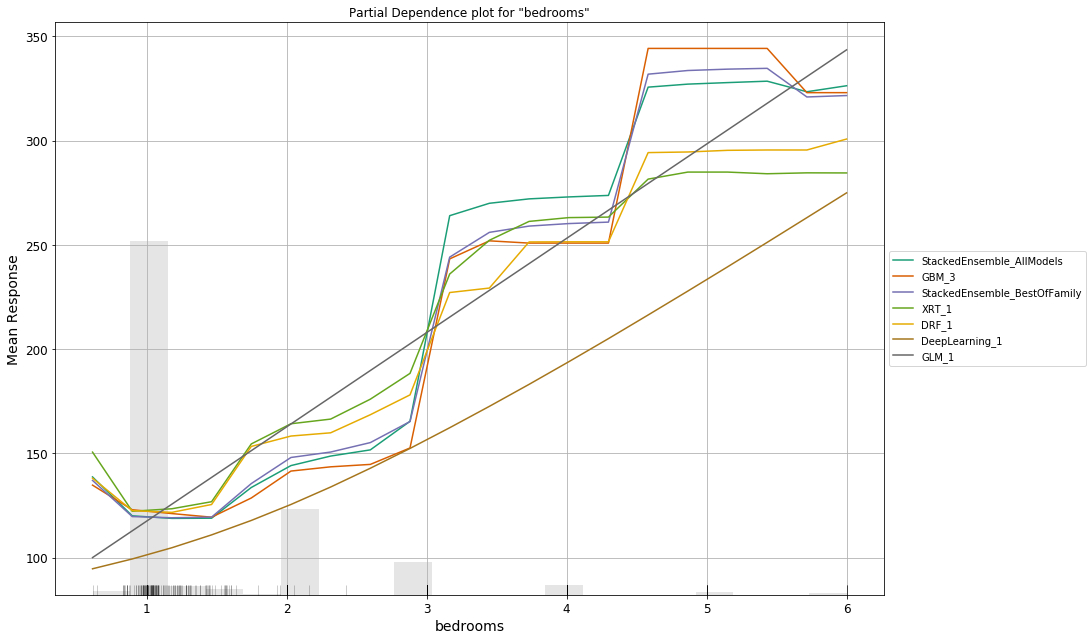

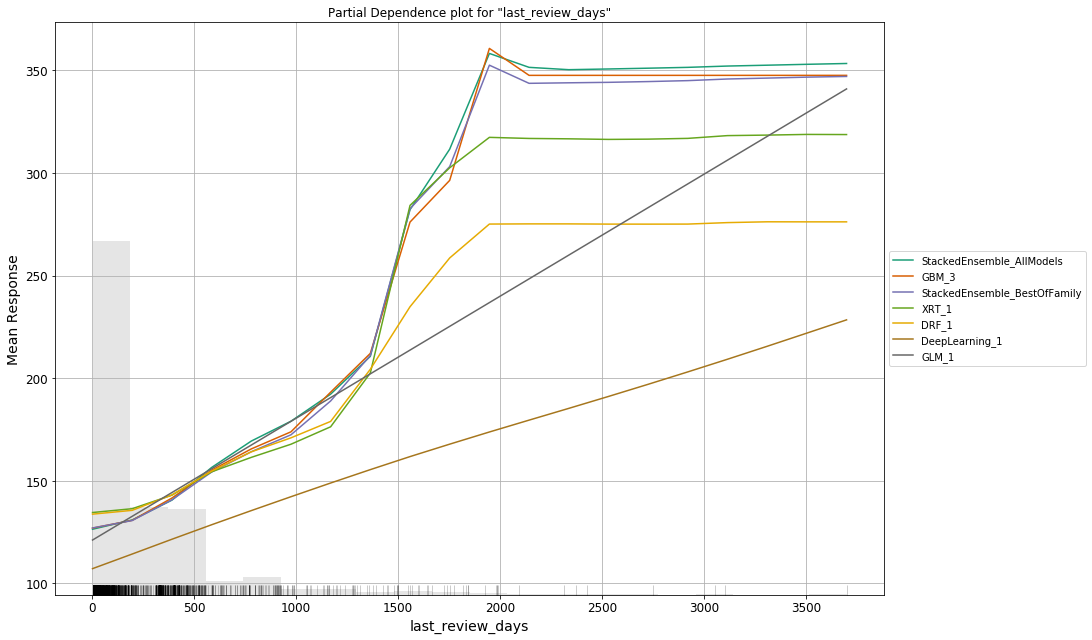

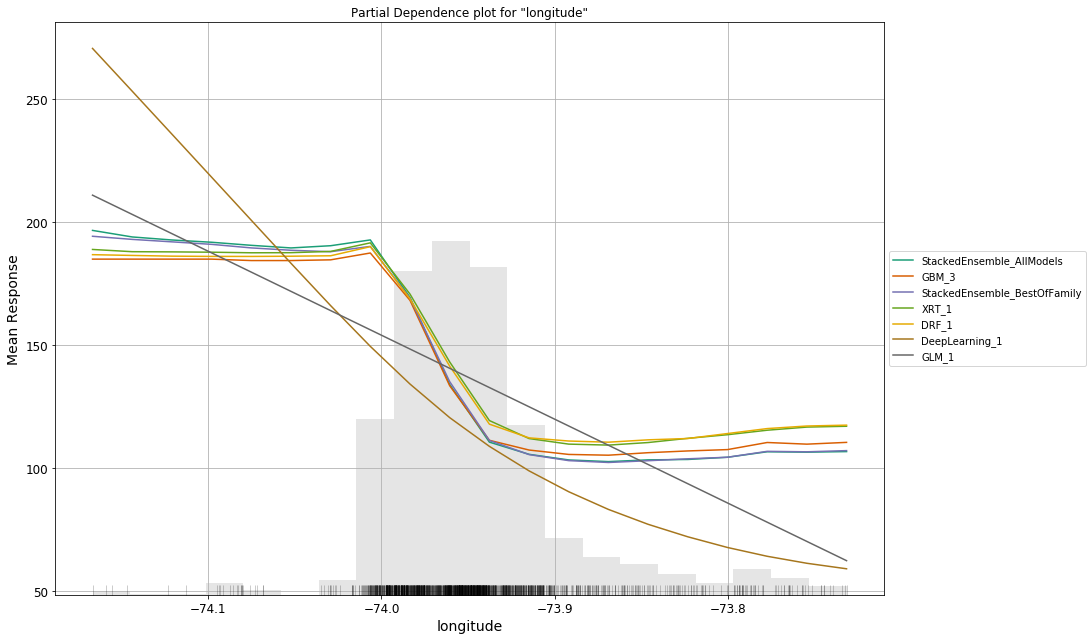

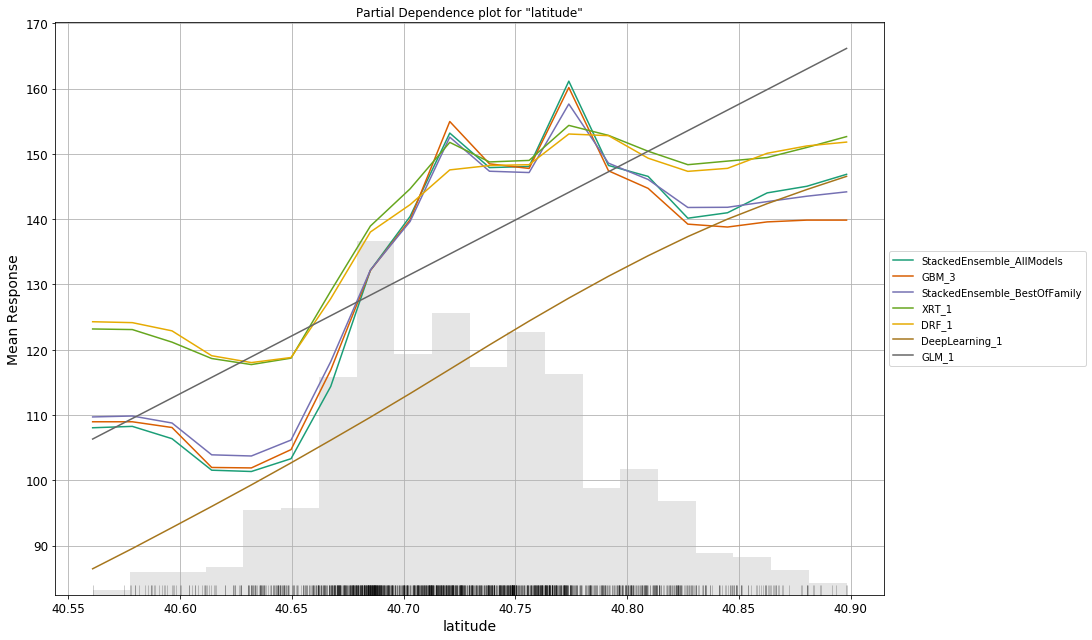

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

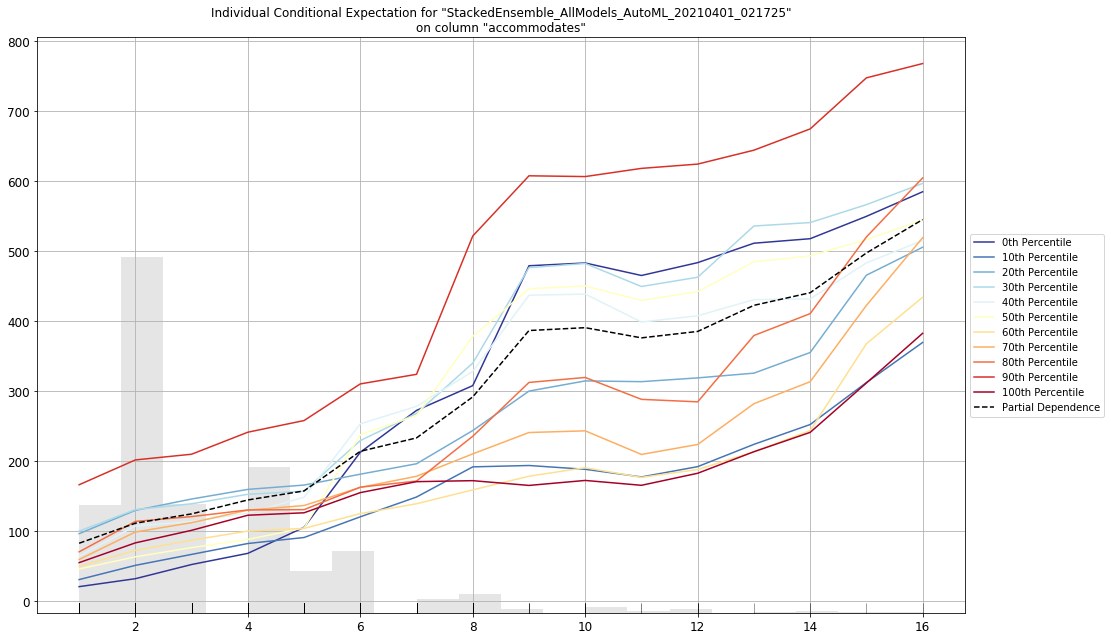

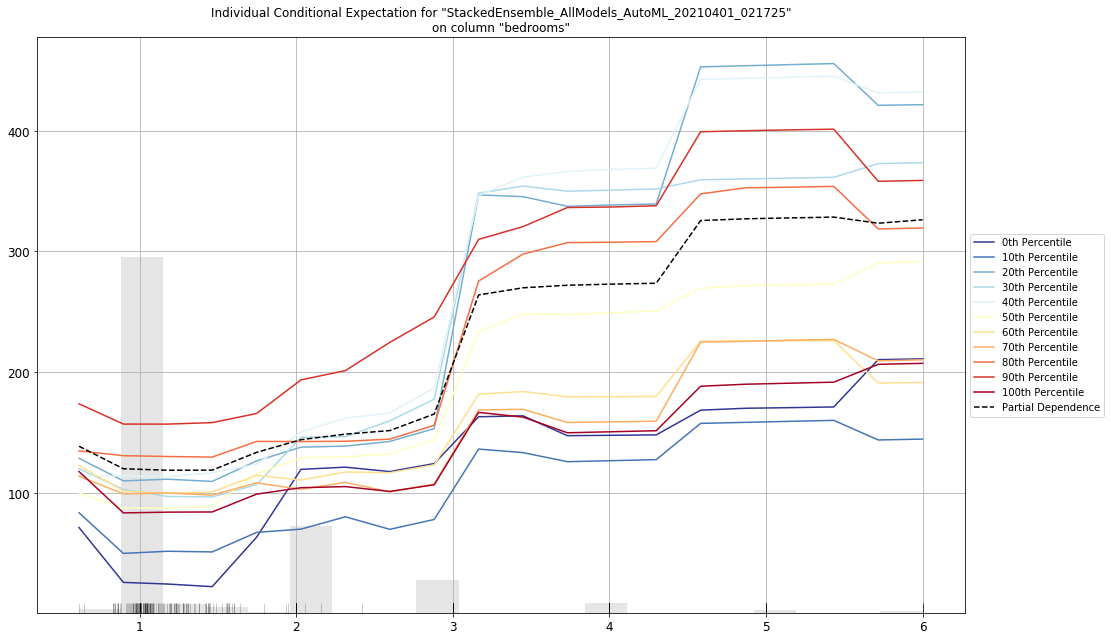

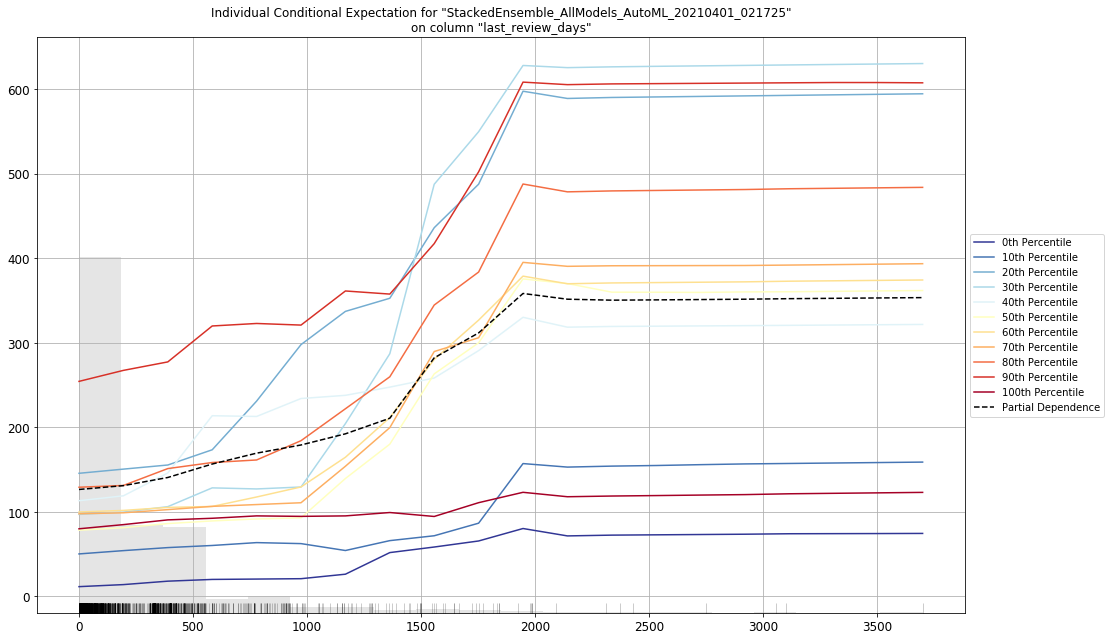

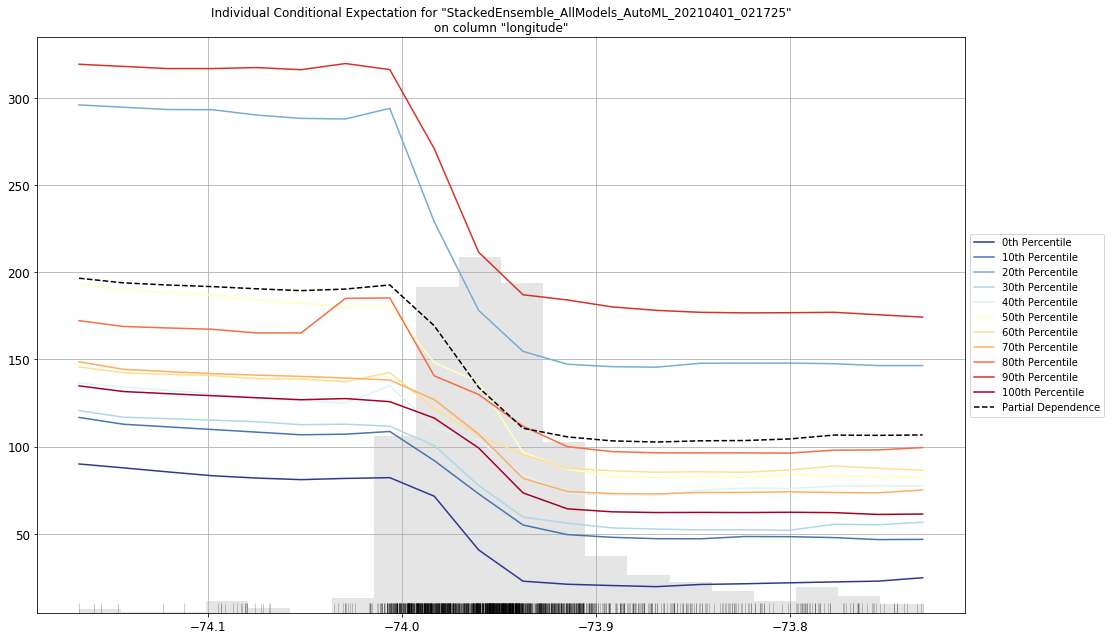

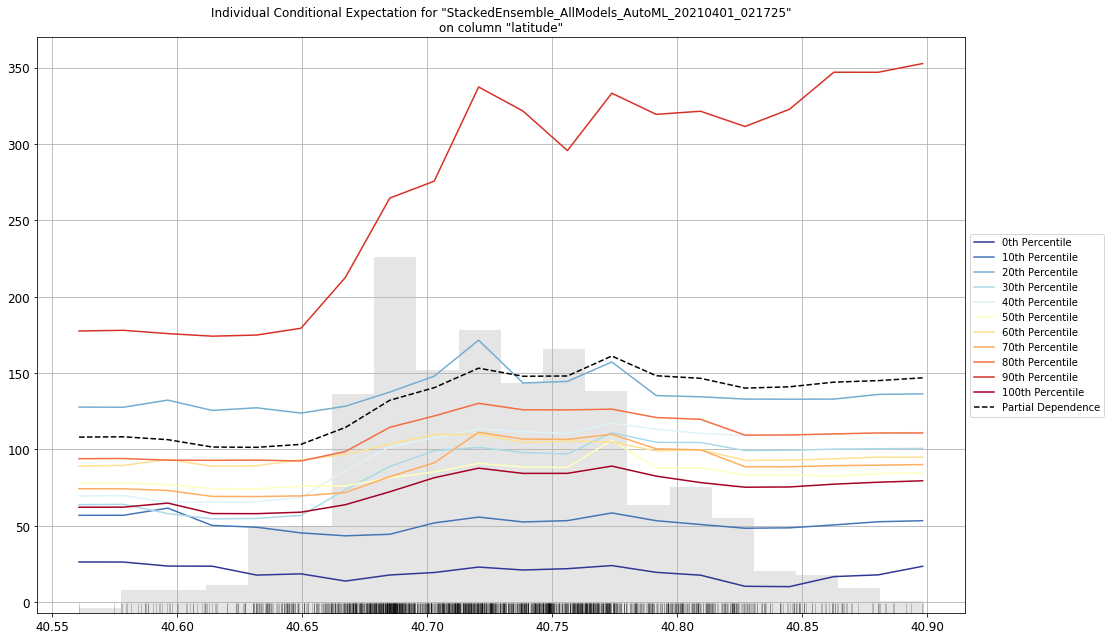

In [497]:
aml.explain(test)